Sprawdzimy liniową zależność pomiędzy ceną, a zdefiniowanymi dotychczas zmiennymi, tzn. zmienne z analizy technicznej oraz zmienne ekonomiczne oraz dane z blockchaina 

In [ ]:
import pandas as pd 

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
# This will prompt for authorization.
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
price = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/df_transformed.csv')

In [ ]:
vader = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/vader_stats_laged.csv')

In [ ]:
tweets = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/tweets_stats_laged.csv')

In [ ]:
blockchain = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/data_blockchain_economic.csv')

Potrzebujemy lagow od 1 do 12 dla danych blockchain 

In [ ]:
blockchain

,date,no_blocks,mean_size,mean_transaction_count,sum_transaction,eurousd,sp_index
0,2016-11-23 00:00:00+00:00,8.0,9.661022e+05,2091.875000,16735.0,1.06324,2201.29
1,2016-11-23 01:00:00+00:00,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29
2,2016-11-23 02:00:00+00:00,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29
3,2016-11-23 03:00:00+00:00,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29
4,2016-11-23 04:00:00+00:00,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29
...,...,...,...,...,...,...,...
21858,2019-05-22 18:00:00+00:00,6.0,1.235171e+06,2767.500000,16605.0,1.11595,2858.35
21859,2019-05-22 19:00:00+00:00,9.0,1.096235e+06,2454.888889,22094.0,1.11592,2860.46
21860,2019-05-22 20:00:00+00:00,9.0,1.128375e+06,1959.444444,17635.0,1.11529,2860.46
21861,2019-05-22 21:00:00+00:00,3.0,1.298723e+06,2694.666667,8084.0,1.11497,2860.46


In [ ]:
max_lag = 12
shape_of_results = blockchain.shape[0] - max_lag 
shape_of_results
i=1
stata = blockchain.iloc[(blockchain.shape[0]-i-shape_of_results):blockchain.shape[0]-i,1:].reset_index().iloc[:,1:]
stata.columns = [name+'_l'+str(i) for name in blockchain.columns[1:]]
for i in list(range(2,13)):
  st = blockchain.iloc[(blockchain.shape[0]-i-shape_of_results):blockchain.shape[0]-i,1:].reset_index().iloc[:,1:]
  st.columns = [name+'_l'+str(i) for name in blockchain.columns[1:]]
  stata = pd.concat([stata,st], 1)
stata['date'] = blockchain.iloc[max_lag:,:]['date'].reset_index()['date']
tweets_stats_laged = stata[[stata.columns[-1]]+list(stata.columns[0:-1])]

In [ ]:
tweets_stats_laged

,date,no_blocks_l1,mean_size_l1,mean_transaction_count_l1,sum_transaction_l1,eurousd_l1,sp_index_l1,no_blocks_l2,mean_size_l2,mean_transaction_count_l2,sum_transaction_l2,eurousd_l2,sp_index_l2,no_blocks_l3,mean_size_l3,mean_transaction_count_l3,sum_transaction_l3,eurousd_l3,sp_index_l3,no_blocks_l4,mean_size_l4,mean_transaction_count_l4,sum_transaction_l4,eurousd_l4,sp_index_l4,no_blocks_l5,mean_size_l5,mean_transaction_count_l5,sum_transaction_l5,eurousd_l5,sp_index_l5,no_blocks_l6,mean_size_l6,mean_transaction_count_l6,sum_transaction_l6,eurousd_l6,sp_index_l6,no_blocks_l7,mean_size_l7,mean_transaction_count_l7,sum_transaction_l7,eurousd_l7,sp_index_l7,no_blocks_l8,mean_size_l8,mean_transaction_count_l8,sum_transaction_l8,eurousd_l8,sp_index_l8,no_blocks_l9,mean_size_l9,mean_transaction_count_l9,sum_transaction_l9,eurousd_l9,sp_index_l9,no_blocks_l10,mean_size_l10,mean_transaction_count_l10,sum_transaction_l10,eurousd_l10,sp_index_l10,no_blocks_l11,mean_size_l11,mean_transaction_count_l11,sum_transaction_l11,eurousd_l11,sp_index_l11,no_blocks_l12,mean_size_l12,mean_transaction_count_l12,sum_transaction_l12,eurousd_l12,sp_index_l12
0,2016-11-23 12:00:00+00:00,3.0,9.989463e+05,2056.000000,6168.0,1.06264,2201.29,11.0,9.430506e+05,2093.818182,23032.0,1.06115,2201.29,5.0,9.983280e+05,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29,8.0,9.661022e+05,2091.875000,16735.0,1.06324,2201.29
1,2016-11-23 13:00:00+00:00,3.0,9.989283e+05,2377.666667,7133.0,1.06216,2201.29,3.0,9.989463e+05,2056.000000,6168.0,1.06264,2201.29,11.0,9.430506e+05,2093.818182,23032.0,1.06115,2201.29,5.0,9.983280e+05,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29
2,2016-11-23 14:00:00+00:00,8.0,7.752540e+05,1424.875000,11399.0,1.06119,2201.29,3.0,9.989283e+05,2377.666667,7133.0,1.06216,2201.29,3.0,9.989463e+05,2056.000000,6168.0,1.06264,2201.29,11.0,9.430506e+05,2093.818182,23032.0,1.06115,2201.29,5.0,9.983280e+05,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29
3,2016-11-23 15:00:00+00:00,3.0,9.981473e+05,2238.333333,6715.0,1.05566,2198.55,8.0,7.752540e+05,1424.875000,11399.0,1.06119,2201.29,3.0,9.989283e+05,2377.666667,7133.0,1.06216,2201.29,3.0,9.989463e+05,2056.000000,6168.0,1.06264,2201.29,11.0,9.430506e+05,2093.818182,23032.0,1.06115,2201.29,5.0,9.983280e+05,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29
4,2016-11-23 16:00:00+00:00,4.0,9.981158e+05,1974.000000,7896.0,1.05528,2199.68,3.0,9.981473e+05,2238.333333,6715.0,1.05566,2198.55,8.0,7.752540e+05,1424.875000,11399.0,1.06119,2201.29,3.0,9.989283e+05,23

In [ ]:
tweets_stats_laged.to_csv('/content/drive/My Drive/Magisterka/dane_final/blockchain_laged_full.csv')

In [ ]:
blockchain = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/blockchain_laged_full.csv')

In [ ]:
blockchain = blockchain[blockchain.columns[1:]]

In [ ]:
price.columns = ['timestamp'] + list(price.columns[1:])

In [ ]:
blockchain.columns = ['timestamp']+ list(blockchain.columns[1:])

In [ ]:
blockchain

,timestamp,no_blocks_l1,mean_size_l1,mean_transaction_count_l1,sum_transaction_l1,eurousd_l1,sp_index_l1,no_blocks_l2,mean_size_l2,mean_transaction_count_l2,sum_transaction_l2,eurousd_l2,sp_index_l2,no_blocks_l3,mean_size_l3,mean_transaction_count_l3,sum_transaction_l3,eurousd_l3,sp_index_l3,no_blocks_l4,mean_size_l4,mean_transaction_count_l4,sum_transaction_l4,eurousd_l4,sp_index_l4,no_blocks_l5,mean_size_l5,mean_transaction_count_l5,sum_transaction_l5,eurousd_l5,sp_index_l5,no_blocks_l6,mean_size_l6,mean_transaction_count_l6,sum_transaction_l6,eurousd_l6,sp_index_l6,no_blocks_l7,mean_size_l7,mean_transaction_count_l7,sum_transaction_l7,eurousd_l7,sp_index_l7,no_blocks_l8,mean_size_l8,mean_transaction_count_l8,sum_transaction_l8,eurousd_l8,sp_index_l8,no_blocks_l9,mean_size_l9,mean_transaction_count_l9,sum_transaction_l9,eurousd_l9,sp_index_l9,no_blocks_l10,mean_size_l10,mean_transaction_count_l10,sum_transaction_l10,eurousd_l10,sp_index_l10,no_blocks_l11,mean_size_l11,mean_transaction_count_l11,sum_transaction_l11,eurousd_l11,sp_index_l11,no_blocks_l12,mean_size_l12,mean_transaction_count_l12,sum_transaction_l12,eurousd_l12,sp_index_l12
0,2016-11-23 12:00:00+00:00,3.0,9.989463e+05,2056.000000,6168.0,1.06264,2201.29,11.0,9.430506e+05,2093.818182,23032.0,1.06115,2201.29,5.0,9.983280e+05,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29,8.0,9.661022e+05,2091.875000,16735.0,1.06324,2201.29
1,2016-11-23 13:00:00+00:00,3.0,9.989283e+05,2377.666667,7133.0,1.06216,2201.29,3.0,9.989463e+05,2056.000000,6168.0,1.06264,2201.29,11.0,9.430506e+05,2093.818182,23032.0,1.06115,2201.29,5.0,9.983280e+05,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29
2,2016-11-23 14:00:00+00:00,8.0,7.752540e+05,1424.875000,11399.0,1.06119,2201.29,3.0,9.989283e+05,2377.666667,7133.0,1.06216,2201.29,3.0,9.989463e+05,2056.000000,6168.0,1.06264,2201.29,11.0,9.430506e+05,2093.818182,23032.0,1.06115,2201.29,5.0,9.983280e+05,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29
3,2016-11-23 15:00:00+00:00,3.0,9.981473e+05,2238.333333,6715.0,1.05566,2198.55,8.0,7.752540e+05,1424.875000,11399.0,1.06119,2201.29,3.0,9.989283e+05,2377.666667,7133.0,1.06216,2201.29,3.0,9.989463e+05,2056.000000,6168.0,1.06264,2201.29,11.0,9.430506e+05,2093.818182,23032.0,1.06115,2201.29,5.0,9.983280e+05,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29
4,2016-11-23 16:00:00+00:00,4.0,9.981158e+05,1974.000000,7896.0,1.05528,2199.68,3.0,9.981473e+05,2238.333333,6715.0,1.05566,2198.55,8.0,7.752540e+05,1424.875000,11399.0,1.06119,2201.29,3.0,9.989283e+

In [ ]:
blockchain['timestamp'] = pd.to_datetime(blockchain['timestamp'], utc = True)
price['timestamp'] = pd.to_datetime(price['timestamp'], utc = True)
vader['timestamp'] = pd.to_datetime(vader['timestamp'], utc = True)
#tweets['timestamp'] = pd.to_datetime(tweets['timestamp'], utc = True)

In [ ]:
df = price.merge(vader, how = 'left', left_on = 'timestamp', right_on = 'timestamp').merge(blockchain, how = 'left', left_on = 'timestamp', right_on = 'timestamp').dropna()

In [ ]:
from scipy.stats import pearsonr

In [ ]:
df

,timestamp,open,Volume BTC,ema_n12_l1,sma_n12_l1,smaps_n12_l1,ema_n24_l1,sma_n24_l1,smaps_n24_l1,ema_n30_l1,sma_n30_l1,smaps_n30_l1,ema_n50_l1,sma_n50_l1,smaps_n50_l1,ema_n100_l1,sma_n100_l1,smaps_n100_l1,ema_n200_l1,sma_n200_l1,smaps_n200_l1,smas_n200_m50_l1,macdss_l1,rsi_n14_l1,k_perc_n14_l1,k_perc_d_n14_l1,cci_n14_l1,lwi_n14_l1,rsi_n24_l1,k_perc_n24_l1,k_perc_d_n24_l1,cci_n24_l1,lwi_n24_l1,rsi_n36_l1,k_perc_n36_l1,k_perc_d_n36_l1,cci_n36_l1,lwi_n36_l1,rsi_n48_l1,k_perc_n48_l1,...,mean_transaction_count_l6,sum_transaction_l6,eurousd_l6,sp_index_l6,no_blocks_l7,mean_size_l7,mean_transaction_count_l7,sum_transaction_l7,eurousd_l7,sp_index_l7,no_blocks_l8,mean_size_l8,mean_transaction_count_l8,sum_transaction_l8,eurousd_l8,sp_index_l8,no_blocks_l9,mean_size_l9,mean_transaction_count_l9,sum_transaction_l9,eurousd_l9,sp_index_l9,no_blocks_l10,mean_size_l10,mean_transaction_count_l10,sum_transaction_l10,eurousd_l10,sp_index_l10,no_blocks_l11,mean_size_l11,mean_transaction_count_l11,sum_transaction_l11,eurousd_l11,sp_index_l11,no_blocks_l12,mean_size_l12,mean_transaction_count_l12,sum_transaction_l12,eurousd_l12,sp_index_l12
12,2016-11-23 12:00:00+00:00,736.75,13.020111,746.840548,745.416667,5.416667,742.525177,744.593333,4.593333,739.772351,742.625333,2.625333,736.783407,739.6006,-0.3994,742.598415,740.5938,0.5938,731.961235,736.65600,-3.34400,-2.94460,1.392506,17.420031,3.199405,3.199405,-151.409930,-96.425603,51.461167,16.085489,-19.281175,-130.009662,-83.914511,48.730881,17.796143,-18.016529,-49.485988,-82.203857,55.802351,27.396594,...,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29,8.0,9.661022e+05,2091.875000,16735.0,1.06324,2201.29
13,2016-11-23 13:00:00+00:00,741.37,6.967744,746.372845,744.979167,8.229167,743.203555,744.770417,8.020417,740.198004,742.811667,6.061667,737.000227,739.7782,3.0282,742.435928,740.4994,3.7494,732.236839,736.78295,0.03295,-2.99525,3.162212,40.085785,41.978387,40.911919,-88.389729,-58.021613,58.416282,42.069741,13.333901,-100.933133,-61.346039,54.518811,43.250689,13.498623,-23.415978,-56.749311,59.559787,49.878345,...,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29
14,2016-11-23 14:00:00+00:00,743.17,39.869988,746.378180,744.012500,2.642500,743.864041,744.808333,3.438333,740.620550,742.889667,1.519667,737.274571,739.8906,-1.4794,742.255225,740.3230,-1.0470,732.448420,736.90305,-4.46695,-2.98755,4.271686,35.813994,56.940981,41.881717,-25.297741,-43.059019,59.467157,49.374628,18.534733,-55.853201,-50.625372,56.293508,53.168044,20.918274,11.617227,-46.831956,59.876094,58.617332,...,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29
15,2016-11-23 15:00:00+00:00,739.92,99.885702,745.856403,743.430833,0.260833,744.630080,745.075833,1.905833,741.118384,743.121667,-0.048333,737.587820,740.0954,-3.0746,741.969852,740.2867,-2.8833,732.691128,737.06020,-6.10980,-3.03520,5.609007,30.349563,29.925187,-4.114404,-52.385867,-70.074813,40.995840,30.017868,-5.825418,-90.319459,-76.547231,55.083109,35.261708,-2.809917,-12.626385,-64.738292,55.277544,38.770193,...,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.33

In [ ]:
d = df.reset_index(drop = True).iloc[0:df.shape[0]-1,:]

In [ ]:
d['open']=df['open'].iloc[1:].reset_index(drop=True)

In [ ]:
cena = d['open']

In [ ]:
df

,timestamp,open,Volume BTC,ema_n12_l1,sma_n12_l1,smaps_n12_l1,ema_n24_l1,sma_n24_l1,smaps_n24_l1,ema_n30_l1,sma_n30_l1,smaps_n30_l1,ema_n50_l1,sma_n50_l1,smaps_n50_l1,ema_n100_l1,sma_n100_l1,smaps_n100_l1,ema_n200_l1,sma_n200_l1,smaps_n200_l1,smas_n200_m50_l1,macdss_l1,rsi_n14_l1,k_perc_n14_l1,k_perc_d_n14_l1,cci_n14_l1,lwi_n14_l1,rsi_n24_l1,k_perc_n24_l1,k_perc_d_n24_l1,cci_n24_l1,lwi_n24_l1,rsi_n36_l1,k_perc_n36_l1,k_perc_d_n36_l1,cci_n36_l1,lwi_n36_l1,rsi_n48_l1,k_perc_n48_l1,...,mean_transaction_count_l6,sum_transaction_l6,eurousd_l6,sp_index_l6,no_blocks_l7,mean_size_l7,mean_transaction_count_l7,sum_transaction_l7,eurousd_l7,sp_index_l7,no_blocks_l8,mean_size_l8,mean_transaction_count_l8,sum_transaction_l8,eurousd_l8,sp_index_l8,no_blocks_l9,mean_size_l9,mean_transaction_count_l9,sum_transaction_l9,eurousd_l9,sp_index_l9,no_blocks_l10,mean_size_l10,mean_transaction_count_l10,sum_transaction_l10,eurousd_l10,sp_index_l10,no_blocks_l11,mean_size_l11,mean_transaction_count_l11,sum_transaction_l11,eurousd_l11,sp_index_l11,no_blocks_l12,mean_size_l12,mean_transaction_count_l12,sum_transaction_l12,eurousd_l12,sp_index_l12
12,2016-11-23 12:00:00+00:00,736.75,13.020111,746.840548,745.416667,5.416667,742.525177,744.593333,4.593333,739.772351,742.625333,2.625333,736.783407,739.6006,-0.3994,742.598415,740.5938,0.5938,731.961235,736.65600,-3.34400,-2.94460,1.392506,17.420031,3.199405,3.199405,-151.409930,-96.425603,51.461167,16.085489,-19.281175,-130.009662,-83.914511,48.730881,17.796143,-18.016529,-49.485988,-82.203857,55.802351,27.396594,...,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29,8.0,9.661022e+05,2091.875000,16735.0,1.06324,2201.29
13,2016-11-23 13:00:00+00:00,741.37,6.967744,746.372845,744.979167,8.229167,743.203555,744.770417,8.020417,740.198004,742.811667,6.061667,737.000227,739.7782,3.0282,742.435928,740.4994,3.7494,732.236839,736.78295,0.03295,-2.99525,3.162212,40.085785,41.978387,40.911919,-88.389729,-58.021613,58.416282,42.069741,13.333901,-100.933133,-61.346039,54.518811,43.250689,13.498623,-23.415978,-56.749311,59.559787,49.878345,...,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29
14,2016-11-23 14:00:00+00:00,743.17,39.869988,746.378180,744.012500,2.642500,743.864041,744.808333,3.438333,740.620550,742.889667,1.519667,737.274571,739.8906,-1.4794,742.255225,740.3230,-1.0470,732.448420,736.90305,-4.46695,-2.98755,4.271686,35.813994,56.940981,41.881717,-25.297741,-43.059019,59.467157,49.374628,18.534733,-55.853201,-50.625372,56.293508,53.168044,20.918274,11.617227,-46.831956,59.876094,58.617332,...,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29
15,2016-11-23 15:00:00+00:00,739.92,99.885702,745.856403,743.430833,0.260833,744.630080,745.075833,1.905833,741.118384,743.121667,-0.048333,737.587820,740.0954,-3.0746,741.969852,740.2867,-2.8833,732.691128,737.06020,-6.10980,-3.03520,5.609007,30.349563,29.925187,-4.114404,-52.385867,-70.074813,40.995840,30.017868,-5.825418,-90.319459,-76.547231,55.083109,35.261708,-2.809917,-12.626385,-64.738292,55.277544,38.770193,...,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.33

In [ ]:
korelacje = pd.Series(index = d.columns[3:])
pvalues = pd.Series(index = d.columns[3:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
for i in d.columns[3:]:
  kol = d[i]
  corr, p_val = pearsonr(cena, kol)
  korelacje[i] = corr
  pvalues[i] = p_val

In [ ]:
pvalues[pvalues>0.05]

macdss_l1            0.885856
k_perc_d_n14_l1      0.967933
k_perc_d_n24_l1      0.900170
k_perc_d_n36_l1      0.908438
k_perc_d_n48_l1      0.849419
roc_n10_l1           0.272843
roc_n12_l1           0.259997
roc_n20_l1           0.079421
macdss_l2            0.676998
k_perc_d_n14_l2      0.932669
k_perc_d_n24_l2      0.888379
k_perc_d_n36_l2      0.884052
k_perc_d_n48_l2      0.834202
roc_n10_l2           0.309268
roc_n12_l2           0.282842
roc_n20_l2           0.071358
macdss_l3            0.498888
k_perc_d_n14_l3      0.919548
k_perc_d_n24_l3      0.895962
k_perc_d_n36_l3      0.881778
k_perc_d_n48_l3      0.834524
roc_n10_l3           0.324512
roc_n12_l3           0.287224
roc_n20_l3           0.061188
macdss_l4            0.372411
k_perc_d_n14_l4      0.918411
k_perc_d_n24_l4      0.908379
k_perc_d_n36_l4      0.870376
k_perc_d_n48_l4      0.827069
roc_n10_l4           0.331945
roc_n12_l4           0.290680
roc_n20_l4           0.050574
mean_neg_l1          0.978371
vadermean_

In [ ]:
df.columns[[i[-2:]=='l1' for i in df.columns]]

Index(['ema_n12_l1', 'sma_n12_l1', 'smaps_n12_l1', 'ema_n24_l1', 'sma_n24_l1',
       'smaps_n24_l1', 'ema_n30_l1', 'sma_n30_l1', 'smaps_n30_l1',
       'ema_n50_l1', 'sma_n50_l1', 'smaps_n50_l1', 'ema_n100_l1',
       'sma_n100_l1', 'smaps_n100_l1', 'ema_n200_l1', 'sma_n200_l1',
       'smaps_n200_l1', 'smas_n200_m50_l1', 'macdss_l1', 'rsi_n14_l1',
       'k_perc_n14_l1', 'k_perc_d_n14_l1', 'cci_n14_l1', 'lwi_n14_l1',
       'rsi_n24_l1', 'k_perc_n24_l1', 'k_perc_d_n24_l1', 'cci_n24_l1',
       'lwi_n24_l1', 'rsi_n36_l1', 'k_perc_n36_l1', 'k_perc_d_n36_l1',
       'cci_n36_l1', 'lwi_n36_l1', 'rsi_n48_l1', 'k_perc_n48_l1',
       'k_perc_d_n48_l1', 'cci_n48_l1', 'lwi_n48_l1', 'roc_n10_l1',
       'roc_n12_l1', 'roc_n20_l1', 'roc_n48_l1', 'roc_n100_l1', 'volume_l1',
       'mean_comp_l1', 'mean_neg_l1', 'mean_neu_l1', 'mean_pos_l1',
       'no_positive_l1', 'no_negative_l1', 'counter_l1', 'positive_ratio_l1',
       'negative_ratio_l1', 'negative_positive_ratio_l1', 'polarity_l1',
     

In [ ]:
korelacje = korelacje[d.columns[[i[-2:]=='l1' for i in d.columns]]]

In [ ]:
korelacje = korelacje.sort_values(ascending = False)

In [ ]:
korelacje.index = [i[:-3] for i in korelacje.index]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
korelacje.index

Index(['sma_n12', 'ema_n12', 'sma_n24', 'sma_n30', 'ema_n24', 'ema_n30',
       'sma_n50', 'ema_n50', 'sma_n100', 'ema_n100', 'sma_n200', 'ema_n200',
       'eurousd', 'sp_index', 'positive_ratio', 'negative_ratio', 'mean_comp',
       'polarity', 'mean_pos', 'counter', 'no_negative', 'sum_pos_neg',
       'no_positive', 'volume', 'mean_size', 'no_blocks', 'roc_n100',
       'roc_n48', 'roc_n20', 'roc_n12', 'roc_n10', 'mean_neg', 'k_perc_d_n14',
       'k_perc_d_n36', 'k_perc_d_n24', 'macdss', 'k_perc_d_n48', 'smaps_n12',
       'cci_n14', 'smaps_n24', 'sum_transaction', 'smaps_n30', 'cci_n24',
       'negative_positive_ratio', 'cci_n36', 'rsi_n24', 'rsi_n14', 'smaps_n50',
       'cci_n48', 'rsi_n36', 'rsi_n48', 'lwi_n14', 'k_perc_n14', 'lwi_n36',
       'k_perc_n36', 'smaps_n100', 'k_perc_n24', 'lwi_n24', 'lwi_n48',
       'k_perc_n48', 'mean_neu', 'mean_transaction_count', 'smaps_n200',
       'smas_n200_m50'],
      dtype='object')

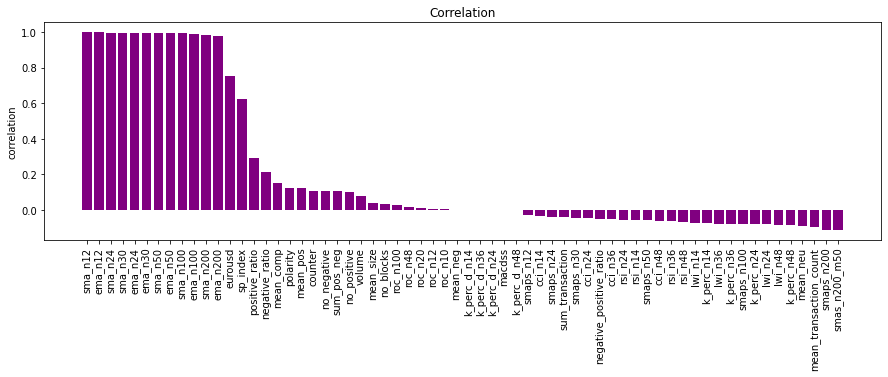

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 4), sharex=True)
kolory = {'comp': 'purple', 'neg':'red', 'neu':'green', 'pos':'blue'}

plt.xticks(rotation='vertical')
ax.bar(list(korelacje.index),
        list(korelacje),
        color='purple')

ax.set(
       ylabel="correlation",
       title="Correlation")



sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
plt.savefig(sciezka+'correlation.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
korelacje.index = [i[:-3] for i in korelacje.index]

In [ ]:
korelacje_technical = korelacje[['sma_n12', 'ema_n12', 'sma_n24', 'sma_n30', 'ema_n24', 'ema_n30',
       'sma_n50', 'ema_n50', 'sma_n100', 'ema_n100', 'sma_n200', 'ema_n200',
        'roc_n100',
       'roc_n48', 'roc_n20', 'roc_n12', 'roc_n10', 'macdss', 'k_perc_d_n14',
        'k_perc_d_n36', 'k_perc_d_n24', 'k_perc_d_n48', 'smaps_n12',
       'cci_n14', 'smaps_n24',  'smaps_n30', 'cci_n24',
        'cci_n36', 'rsi_n14', 'rsi_n24', 'smaps_n50',
       'cci_n48', 'rsi_n36', 'rsi_n48', 'lwi_n14', 'k_perc_n14', 'lwi_n36',
       'k_perc_n36', 'smaps_n100', 'k_perc_n24', 'lwi_n24', 'lwi_n48',
       'k_perc_n48',  'smaps_n200',
       'smas_n200_m50', 'volume']]

korelacje_sentiment = korelacje[['positive_ratio', 'negative_ratio', 'mean_comp',
       'polarity', 'mean_pos', 'counter', 'no_negative', 'sum_pos_neg',
       'no_positive', 
       'mean_neg', 
       'negative_positive_ratio', 'mean_neu']]

korelacje_blockchain = korelacje[[ 'mean_size', 'no_blocks', 'sum_transaction',  'mean_transaction_count']]

korelacje_economy = korelacje[['eurousd', 'sp_index']]


korelacje_blockchain = np.round(korelacje_blockchain,3)
korelacje_economy = np.round(korelacje_economy,3)
korelacje_sentiment = np.round(korelacje_sentiment,3)
korelacje_technical = np.round(korelacje_technical,3)

In [ ]:
korelacje_technical_1 = korelacje_technical.iloc[0:15]
korelacje_technical_2 = korelacje_technical.iloc[15:30]
korelacje_technical_3 = korelacje_technical.iloc[30:]

In [ ]:
korelacje_technical_1

sma_n12     0.999
ema_n12     0.998
sma_n24     0.998
sma_n30     0.997
ema_n24     0.997
ema_n30     0.996
sma_n50     0.996
ema_n50     0.994
sma_n100    0.992
ema_n100    0.989
sma_n200    0.985
ema_n200    0.977
roc_n100    0.028
roc_n48     0.017
roc_n20     0.012
dtype: float64

In [ ]:
korelacje_technical_polaczone = pd.concat([korelacje_technical_1.reset_index(), korelacje_technical_2.reset_index(), korelacje_technical_3.reset_index()],1)

In [ ]:
print(korelacje_technical_polaczone.fillna('').to_latex(index = False))

\begin{tabular}{lllllr}
\toprule
    index &      0 &         index &      0 &          index &      0 \\
\midrule
  sma\_n12 &  0.999 &       roc\_n12 &  0.008 &      smaps\_n50 & -0.055 \\
  ema\_n12 &  0.998 &       roc\_n10 &  0.007 &        cci\_n48 & -0.060 \\
  sma\_n24 &  0.998 &        macdss & -0.001 &        rsi\_n36 & -0.061 \\
  sma\_n30 &  0.997 &  k\_perc\_d\_n14 &     -0 &        rsi\_n48 & -0.066 \\
  ema\_n24 &  0.997 &  k\_perc\_d\_n36 & -0.001 &        lwi\_n14 & -0.074 \\
  ema\_n30 &  0.996 &  k\_perc\_d\_n24 & -0.001 &     k\_perc\_n14 & -0.075 \\
  sma\_n50 &  0.996 &  k\_perc\_d\_n48 & -0.001 &        lwi\_n36 & -0.077 \\
  ema\_n50 &  0.994 &     smaps\_n12 & -0.026 &     k\_perc\_n36 & -0.077 \\
 sma\_n100 &  0.992 &       cci\_n14 & -0.034 &     smaps\_n100 & -0.078 \\
 ema\_n100 &  0.989 &     smaps\_n24 & -0.038 &     k\_perc\_n24 & -0.078 \\
 sma\_n200 &  0.985 &     smaps\_n30 & -0.043 &        lwi\_n24 & -0.078 \\
 ema\_n200 &  0.977 &       cci\_n24 & 

In [ ]:
korelacje_technical_polaczone = pd.concat([korelacje_technical_1.reset_index(), korelacje_technical_2.reset_index(), korelacje_technical_3.reset_index()],1)
print(pd.concat([korelacje_sentiment.reset_index(),korelacje_blockchain.reset_index(), korelacje_economy.reset_index()],1).fillna('').to_latex(index=False))

\begin{tabular}{lrllll}
\toprule
                   index &      0 &                   index &      0 &     index &      0 \\
\midrule
          positive\_ratio &  0.295 &               mean\_size &  0.042 &   eurousd &  0.752 \\
          negative\_ratio &  0.217 &               no\_blocks &  0.034 &  sp\_index &  0.624 \\
               mean\_comp &  0.150 &         sum\_transaction &  -0.04 &           &        \\
                polarity &  0.123 &  mean\_transaction\_count & -0.094 &           &        \\
                mean\_pos &  0.123 &                         &        &           &        \\
                 counter &  0.110 &                         &        &           &        \\
             no\_negative &  0.105 &                         &        &           &        \\
             sum\_pos\_neg &  0.104 &                         &        &           &        \\
             no\_positive &  0.103 &                         &        &           &        \\
              

In [ ]:
korelacje_blockchain=pd.DataFrame(korelacje_blockchain).transpose()
korelacje_blockchain.index = ['correlation']

In [ ]:
korelacje_sentiment=pd.DataFrame(korelacje_sentiment).transpose()
korelacje_sentiment.index = ['correlation']

In [ ]:
korelacje_economy=pd.DataFrame(korelacje_economy).transpose()
korelacje_economy.index = ['correlation']

In [ ]:
korelacje_technical=pd.DataFrame(korelacje_technical).transpose()
korelacje_technical.index = ['correlation']

In [ ]:
print(korelacje_technical.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &  sma\_n12 &  ema\_n12 &  sma\_n24 &  sma\_n30 &  ema\_n24 &  ema\_n30 &  sma\_n50 &  ema\_n50 &  sma\_n100 &  ema\_n100 &  sma\_n200 &  ema\_n200 &  roc\_n100 &  roc\_n48 &  roc\_n20 &  roc\_n12 &  roc\_n10 &  macdss &  k\_perc\_d\_n14 &  k\_perc\_d\_n36 &  k\_perc\_d\_n24 &  k\_perc\_d\_n48 &  smaps\_n12 &  cci\_n14 &  smaps\_n24 &  smaps\_n30 &  cci\_n24 &  cci\_n36 &  rsi\_n14 &  rsi\_n24 &  smaps\_n50 &  cci\_n48 &  rsi\_n36 &  rsi\_n48 &  lwi\_n14 &  k\_perc\_n14 &  lwi\_n36 &  k\_perc\_n36 &  smaps\_n100 &  k\_perc\_n24 &  lwi\_n24 &  lwi\_n48 &  k\_perc\_n48 &  smaps\_n200 &  smas\_n200\_m50 \\
\midrule
correlation &    0.999 &    0.998 &    0.998 &    0.998 &    0.997 &    0.996 &    0.996 &    0.994 &     0.993 &     0.989 &     0.985 &     0.977 &     0.028 &    0.017 &    0.012 &    0.008 &    0.008 &   0.001 &          -0.0 &        -0.001 &        -0.001 &        -0.001 &     -0.027 &   -0.034 & 

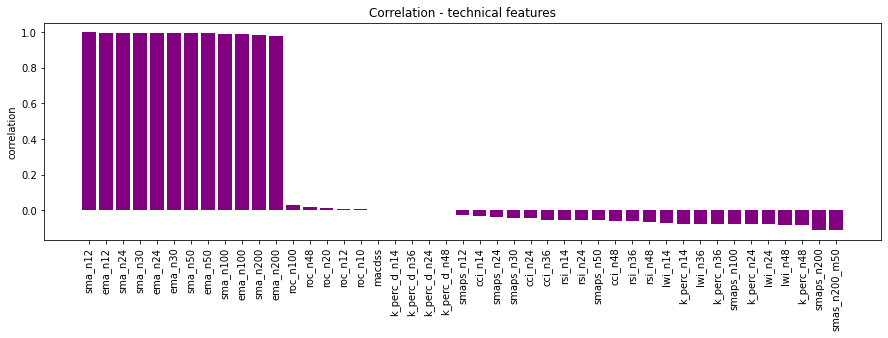

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 4), sharex=True)
kolory = {'comp': 'purple', 'neg':'red', 'neu':'green', 'pos':'blue'}

plt.xticks(rotation='vertical')
ax.bar(list(korelacje_technical.index),
        list(korelacje_technical),
        color='purple')

ax.set(
       ylabel="correlation",
       title="Correlation - technical features")



sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
#plt.savefig(sciezka+'correlation.png', dpi=300, bbox_inches='tight')
plt.show()

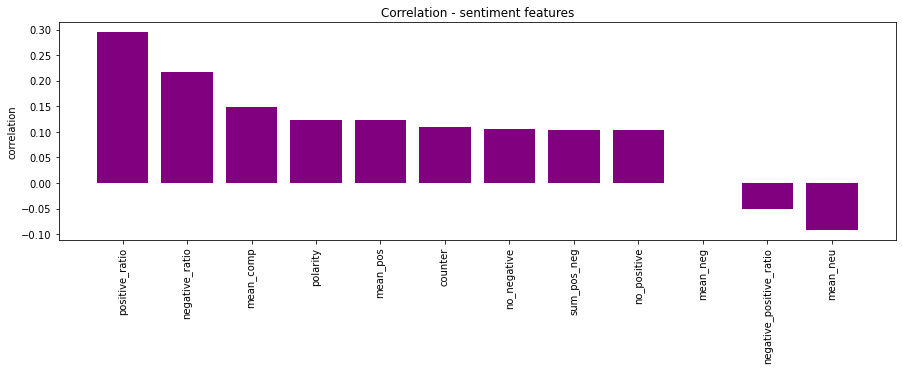

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 4), sharex=True)
kolory = {'comp': 'purple', 'neg':'red', 'neu':'green', 'pos':'blue'}

plt.xticks(rotation='vertical')
ax.bar(list(korelacje_sentiment.index),
        list(korelacje_sentiment),
        color='purple')

ax.set(
       ylabel="correlation",
       title="Correlation - sentiment features")



sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
#plt.savefig(sciezka+'correlation.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
for i in df.columns[[i[-2:]=='l1' for i in df.columns]]:
  print(i)
  print(korelacje[i])

ema_n12_l1
0.9982856798272505
sma_n12_l1
0.9988373238110946
smaps_n12_l1
-0.02679854813875258
ema_n24_l1
0.9968898854053626
sma_n24_l1
0.9979714923456801
smaps_n24_l1
-0.03806487640740875
ema_n30_l1
0.9961823644157796
sma_n30_l1
0.9975028170089877
smaps_n30_l1
-0.04289223356726301
ema_n50_l1
0.9941508531408871
sma_n50_l1
0.9961350253745761
smaps_n50_l1
-0.05524365513017349
ema_n100_l1
0.9887225893902238
sma_n100_l1
0.9926005221080242
smaps_n100_l1
-0.07806425157993953
ema_n200_l1
0.9772184723397259
sma_n200_l1
0.9851470035255012
smaps_n200_l1
-0.11109655858202856
smas_n200_m50_l1
-0.11201580072376405
macdss_l1
0.0007690697691369419
rsi_n14_l1
-0.054526499552082254
k_perc_n14_l1
-0.07489522803978801
k_perc_d_n14_l1
-4.9045821052777066e-05
cci_n14_l1
-0.03406815166023269
lwi_n14_l1
-0.07361163529033089
rsi_n24_l1
-0.05454613135051382
k_perc_n24_l1
-0.07822183224120347
k_perc_d_n24_l1
-0.0007985081787820118
cci_n24_l1
-0.04507980708092843
lwi_n24_l1
-0.07848516716080581
rsi_n36_l1
-0.0607

In [ ]:
list(tweets.columns)

['timestamp',
 'mean_positive_l1',
 'mean_negative_l1',
 'no_positive_l1',
 'no_negative_l1',
 'counter_l1',
 'positive_ratio_l1',
 'negative_ratio_l1',
 'negative_positive_ratio_l1',
 'polarity_l1',
 'sum_pos_neg_l1',
 'mean_positive_l2',
 'mean_negative_l2',
 'no_positive_l2',
 'no_negative_l2',
 'counter_l2',
 'positive_ratio_l2',
 'negative_ratio_l2',
 'negative_positive_ratio_l2',
 'polarity_l2',
 'sum_pos_neg_l2',
 'mean_positive_l3',
 'mean_negative_l3',
 'no_positive_l3',
 'no_negative_l3',
 'counter_l3',
 'positive_ratio_l3',
 'negative_ratio_l3',
 'negative_positive_ratio_l3',
 'polarity_l3',
 'sum_pos_neg_l3',
 'mean_positive_l4',
 'mean_negative_l4',
 'no_positive_l4',
 'no_negative_l4',
 'counter_l4',
 'positive_ratio_l4',
 'negative_ratio_l4',
 'negative_positive_ratio_l4',
 'polarity_l4',
 'sum_pos_neg_l4',
 'mean_positive_l5',
 'mean_negative_l5',
 'no_positive_l5',
 'no_negative_l5',
 'counter_l5',
 'positive_ratio_l5',
 'negative_ratio_l5',
 'negative_positive_ratio_l

# Boruta 

In [ ]:
vader

,timestamp,mean_comp_l1,mean_neg_l1,mean_neu_l1,mean_pos_l1,no_positive_l1,no_negative_l1,counter_l1,positive_ratio_l1,negative_ratio_l1,negative_positive_ratio_l1,polarity_l1,sum_pos_neg_l1,vadermean_comp_l2,vadermean_neg_l2,vadermean_neu_l2,vadermean_pos_l2,vaderno_positive_l2,vaderno_negative_l2,vadercounter_l2,vaderpositive_ratio_l2,vadernegative_ratio_l2,vadernegative_positive_ratio_l2,vaderpolarity_l2,vadersum_pos_neg_l2,vadermean_comp_l3,vadermean_neg_l3,vadermean_neu_l3,vadermean_pos_l3,vaderno_positive_l3,vaderno_negative_l3,vadercounter_l3,vaderpositive_ratio_l3,vadernegative_ratio_l3,vadernegative_positive_ratio_l3,vaderpolarity_l3,vadersum_pos_neg_l3,vadermean_comp_l4,vadermean_neg_l4,vadermean_neu_l4,...,vadernegative_ratio_l9,vadernegative_positive_ratio_l9,vaderpolarity_l9,vadersum_pos_neg_l9,vadermean_comp_l10,vadermean_neg_l10,vadermean_neu_l10,vadermean_pos_l10,vaderno_positive_l10,vaderno_negative_l10,vadercounter_l10,vaderpositive_ratio_l10,vadernegative_ratio_l10,vadernegative_positive_ratio_l10,vaderpolarity_l10,vadersum_pos_neg_l10,vadermean_comp_l11,vadermean_neg_l11,vadermean_neu_l11,vadermean_pos_l11,vaderno_positive_l11,vaderno_negative_l11,vadercounter_l11,vaderpositive_ratio_l11,vadernegative_ratio_l11,vadernegative_positive_ratio_l11,vaderpolarity_l11,vadersum_pos_neg_l11,vadermean_comp_l12,vadermean_neg_l12,vadermean_neu_l12,vadermean_pos_l12,vaderno_positive_l12,vaderno_negative_l12,vadercounter_l12,vaderpositive_ratio_l12,vadernegative_ratio_l12,vadernegative_positive_ratio_l12,vaderpolarity_l12,vadersum_pos_neg_l12
0,2016-11-23 12:00:00+00:00,0.037829,0.036429,0.901857,0.061857,0.0,0.0,7,0.000000,0.000000,0.000000,0.047470,0.0,-0.009382,0.023182,0.955909,0.021000,0.0,0.0,11,0.000000,0.000000,0.000000,0.022064,0.0,-0.009382,0.023182,0.955909,0.021000,0.0,0.0,11,0.000000,0.000000,0.000000,0.022064,0.0,-0.012900,0.031875,0.939375,...,0.000000,0.000000,0.030338,0.0,-0.005160,0.013100,0.975000,0.011900,0.0,0.0,10,0.000000,0.000000,0.000000,0.012486,0.0,-0.010320,0.025500,0.951500,0.023100,0.0,0.0,10,0.000000,0.000000,0.000000,0.024270,0.0,-0.014743,0.036429,0.930714,0.033000,0.0,0.0,7,0.000000,0.000000,0.000000,0.034672,0.0
1,2016-11-23 13:00:00+00:00,-0.012900,0.031875,0.939375,0.028875,0.0,0.0,8,0.000000,0.000000,0.000000,0.030338,0.0,0.037829,0.036429,0.901857,0.061857,0.0,0.0,7,0.000000,0.000000,0.000000,0.047470,0.0,-0.009382,0.023182,0.955909,0.021000,0.0,0.0,11,0.000000,0.000000,0.000000,0.022064,0.0,-0.009382,0.023182,0.955909,...,0.000000,0.000000,0.016728,1.0,-0.012900,0.031875,0.939375,0.028875,0.0,0.0,8,0.000000,0.000000,0.000000,0.030338,0.0,-0.005160,0.013100,0.975000,0.011900,0.0,0.0,10,0.000000,0.000000,0.000000,0.012486,0.0,-0.010320,0.025500,0.951500,0.023100,0.0,0.0,10,0.000000,0.000000,0.000000,0.024270,0.0
2,2016-11-23 14:00:00+00:00,0.025938,0.019615,0.952000,0.028462,0.0,0.0,13,0.000000,0.000000,0.000000,0.023628,0.0,-0.012900,0.031875,0.939375,0.028875,0.0,0.0,8,0.000000,0.000000,0.000000,0.030338,0.0,0.037829,0.036429,0.901857,0.061857,0.0,0.0,7,0.000000,0.000000,0.000000,0.047470,0.0,-0.009382,0.023182,0.955909,...,0.000000,0.000000,0.025320,2.0,0.044100,0.010077,0.962154,0.027769,1.0,0.0,13,0.076923,0.000000,0.000000,0.016728,1.0,-0.012900,0.031875,0.939375,0.028875,0.0,0.0,8,0.000000,0.000000,0.000000,0.030338,0.0,-0.005160,0.013100,0.975000,0.011900,0.0,0.0,10,0.000000,0.000000,0.000000,0.012486,0.0
3,2016-11-23 15:00:00+00:00,0.121762,0.031875,0.901125,0.067125,1.0,0.0,8,0.125000,0.000000,0.000000,0.046256,1.0,0.025938,0.019615,0.952000,0.028462,0.0,0.0,13,0.000000,0.000000,0.000000,0.023628,0.0,-0.012900,0.031875,0.939375,0.028875,0.0,0.0,8,0.000000,0.000000,0.000000,0.030338,0.0,0.037829,0.036429,0.901857,...,0.000000,0.000000,0.041347,4.0,0.056250,0.016143,0.944143,0.039714,2.0,0.0,14,0.142857,0.000000,0.000000,0.025320,2.0,0.044100,0.010077,0.962154,0.027769,1.0,0.0,13,0.076923,0.000000,0.000000,0.016728,1.0,-0.012900,0.031875,0.939375,0.028875,0.0,0.0,8,0.000000,0

In [ ]:
blockchain = blockchain.iloc[:,1:]

In [ ]:
blockchain.columns = ['timestamp'] + list(blockchain.columns[1:])

In [ ]:
price.columns = ['timestamp'] + list(price.columns[1:])

In [ ]:
vader['timestamp'] = pd.to_datetime(vader['timestamp'], utc = True)
price['timestamp'] = pd.to_datetime(price['timestamp'], utc = True)
blockchain['timestamp'] = pd.to_datetime(blockchain['timestamp'], utc = True)

In [ ]:
df = price.merge(vader, how = 'left', left_on = 'timestamp', right_on = 'timestamp').merge(blockchain, how = 'left', left_on = 'timestamp', right_on = 'timestamp').dropna()

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,timestamp,open,Volume BTC,ema_n12_l1,sma_n12_l1,smaps_n12_l1,ema_n24_l1,sma_n24_l1,smaps_n24_l1,ema_n30_l1,sma_n30_l1,smaps_n30_l1,ema_n50_l1,sma_n50_l1,smaps_n50_l1,ema_n100_l1,sma_n100_l1,smaps_n100_l1,ema_n200_l1,sma_n200_l1,smaps_n200_l1,smas_n200_m50_l1,macdss_l1,rsi_n14_l1,k_perc_n14_l1,k_perc_d_n14_l1,cci_n14_l1,lwi_n14_l1,rsi_n24_l1,k_perc_n24_l1,k_perc_d_n24_l1,cci_n24_l1,lwi_n24_l1,rsi_n36_l1,k_perc_n36_l1,k_perc_d_n36_l1,cci_n36_l1,lwi_n36_l1,rsi_n48_l1,k_perc_n48_l1,...,mean_transaction_count_l6,sum_transaction_l6,eurousd_l6,sp_index_l6,no_blocks_l7,mean_size_l7,mean_transaction_count_l7,sum_transaction_l7,eurousd_l7,sp_index_l7,no_blocks_l8,mean_size_l8,mean_transaction_count_l8,sum_transaction_l8,eurousd_l8,sp_index_l8,no_blocks_l9,mean_size_l9,mean_transaction_count_l9,sum_transaction_l9,eurousd_l9,sp_index_l9,no_blocks_l10,mean_size_l10,mean_transaction_count_l10,sum_transaction_l10,eurousd_l10,sp_index_l10,no_blocks_l11,mean_size_l11,mean_transaction_count_l11,sum_transaction_l11,eurousd_l11,sp_index_l11,no_blocks_l12,mean_size_l12,mean_transaction_count_l12,sum_transaction_l12,eurousd_l12,sp_index_l12
12,2016-11-23 12:00:00+00:00,736.75,13.020111,746.840548,745.416667,5.416667,742.525177,744.593333,4.593333,739.772351,742.625333,2.625333,736.783407,739.6006,-0.3994,742.598415,740.5938,0.5938,731.961235,736.65600,-3.34400,-2.94460,1.392506,17.420031,3.199405,3.199405,-151.409930,-96.425603,51.461167,16.085489,-19.281175,-130.009662,-83.914511,48.730881,17.796143,-18.016529,-49.485988,-82.203857,55.802351,27.396594,...,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29,8.0,9.661022e+05,2091.875000,16735.0,1.06324,2201.29
13,2016-11-23 13:00:00+00:00,741.37,6.967744,746.372845,744.979167,8.229167,743.203555,744.770417,8.020417,740.198004,742.811667,6.061667,737.000227,739.7782,3.0282,742.435928,740.4994,3.7494,732.236839,736.78295,0.03295,-2.99525,3.162212,40.085785,41.978387,40.911919,-88.389729,-58.021613,58.416282,42.069741,13.333901,-100.933133,-61.346039,54.518811,43.250689,13.498623,-23.415978,-56.749311,59.559787,49.878345,...,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29
14,2016-11-23 14:00:00+00:00,743.17,39.869988,746.378180,744.012500,2.642500,743.864041,744.808333,3.438333,740.620550,742.889667,1.519667,737.274571,739.8906,-1.4794,742.255225,740.3230,-1.0470,732.448420,736.90305,-4.46695,-2.98755,4.271686,35.813994,56.940981,41.881717,-25.297741,-43.059019,59.467157,49.374628,18.534733,-55.853201,-50.625372,56.293508,53.168044,20.918274,11.617227,-46.831956,59.876094,58.617332,...,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29
15,2016-11-23 15:00:00+00:00,739.92,99.885702,745.856403,743.430833,0.260833,744.630080,745.075833,1.905833,741.118384,743.121667,-0.048333,737.587820,740.0954,-3.0746,741.969852,740.2867,-2.8833,732.691128,737.06020,-6.10980,-3.03520,5.609007,30.349563,29.925187,-4.114404,-52.385867,-70.074813,40.995840,30.017868,-5.825418,-90.319459,-76.547231,55.083109,35.261708,-2.809917,-12.626385,-64.738292,55.277544,38.770193,...,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.33

In [ ]:
data = df.iloc[1:,:].reset_index(drop = True)

In [ ]:
data['y']= ((df.open.iloc[1:].reset_index(drop = True) - df.open.iloc[0:df.shape[0]-1])>0).apply(lambda x: int(x))

In [ ]:
data.columns

Index(['timestamp', 'open', 'Volume BTC', 'ema_n12_l1', 'sma_n12_l1',
       'smaps_n12_l1', 'ema_n24_l1', 'sma_n24_l1', 'smaps_n24_l1',
       'ema_n30_l1',
       ...
       'sum_transaction_l11', 'eurousd_l11', 'sp_index_l11', 'no_blocks_l12',
       'mean_size_l12', 'mean_transaction_count_l12', 'sum_transaction_l12',
       'eurousd_l12', 'sp_index_l12', 'y'],
      dtype='object', length=404)

In [ ]:
data = data[['y']+list(data.columns[0:-1])]

In [ ]:
data

,y,timestamp,open,Volume BTC,ema_n12_l1,sma_n12_l1,smaps_n12_l1,ema_n24_l1,sma_n24_l1,smaps_n24_l1,ema_n30_l1,sma_n30_l1,smaps_n30_l1,ema_n50_l1,sma_n50_l1,smaps_n50_l1,ema_n100_l1,sma_n100_l1,smaps_n100_l1,ema_n200_l1,sma_n200_l1,smaps_n200_l1,smas_n200_m50_l1,macdss_l1,rsi_n14_l1,k_perc_n14_l1,k_perc_d_n14_l1,cci_n14_l1,lwi_n14_l1,rsi_n24_l1,k_perc_n24_l1,k_perc_d_n24_l1,cci_n24_l1,lwi_n24_l1,rsi_n36_l1,k_perc_n36_l1,k_perc_d_n36_l1,cci_n36_l1,lwi_n36_l1,rsi_n48_l1,...,mean_transaction_count_l6,sum_transaction_l6,eurousd_l6,sp_index_l6,no_blocks_l7,mean_size_l7,mean_transaction_count_l7,sum_transaction_l7,eurousd_l7,sp_index_l7,no_blocks_l8,mean_size_l8,mean_transaction_count_l8,sum_transaction_l8,eurousd_l8,sp_index_l8,no_blocks_l9,mean_size_l9,mean_transaction_count_l9,sum_transaction_l9,eurousd_l9,sp_index_l9,no_blocks_l10,mean_size_l10,mean_transaction_count_l10,sum_transaction_l10,eurousd_l10,sp_index_l10,no_blocks_l11,mean_size_l11,mean_transaction_count_l11,sum_transaction_l11,eurousd_l11,sp_index_l11,no_blocks_l12,mean_size_l12,mean_transaction_count_l12,sum_transaction_l12,eurousd_l12,sp_index_l12
0,0,2016-11-23 13:00:00+00:00,741.37,6.967744,746.372845,744.979167,8.229167,743.203555,744.770417,8.020417,740.198004,742.811667,6.061667,737.000227,739.7782,3.0282,742.435928,740.4994,3.7494,732.236839,736.78295,0.03295,-2.99525,3.162212,40.085785,41.978387,40.911919,-88.389729,-58.021613,58.416282,42.069741,13.333901,-100.933133,-61.346039,54.518811,43.250689,13.498623,-23.415978,-56.749311,59.559787,...,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29,5.0,9.965862e+05,2048.400000,10242.0,1.06240,2201.29
1,0,2016-11-23 14:00:00+00:00,743.17,39.869988,746.378180,744.012500,2.642500,743.864041,744.808333,3.438333,740.620550,742.889667,1.519667,737.274571,739.8906,-1.4794,742.255225,740.3230,-1.0470,732.448420,736.90305,-4.46695,-2.98755,4.271686,35.813994,56.940981,41.881717,-25.297741,-43.059019,59.467157,49.374628,18.534733,-55.853201,-50.625372,56.293508,53.168044,20.918274,11.617227,-46.831956,59.876094,...,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29,7.0,9.982819e+05,1858.428571,13009.0,1.06237,2201.29
2,0,2016-11-23 15:00:00+00:00,739.92,99.885702,745.856403,743.430833,0.260833,744.630080,745.075833,1.905833,741.118384,743.121667,-0.048333,737.587820,740.0954,-3.0746,741.969852,740.2867,-2.8833,732.691128,737.06020,-6.10980,-3.03520,5.609007,30.349563,29.925187,-4.114404,-52.385867,-70.074813,40.995840,30.017868,-5.825418,-90.319459,-76.547231,55.083109,35.261708,-2.809917,-12.626385,-64.738292,55.277544,...,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,1692.333333,15231.0,1.06385,2201.29,5.0,9.486772e+05,1749.200000,8746.0,1.06292,2201.29,7.0,9.271026e+05,1860.428571,13023.0,1.06258,2201.29,6.0,9.991432e+05,2303.833333,13823.0,1.06255,2201.29,14.0,9.268978e+05,1525.857143,21362.0,1.06303,2201.29
3,0,2016-11-23 16:00:00+00:00,738.38,223.448066,745.281859,742.999167,3.079167,745.573345,745.385833,5.465833,741.668530,743.394333,3.474333,737.924832,740.3362,0.4162,741.902983,740.2429,0.3229,732.971453,737.20990,-2.71010,-3.12630,6.517068,28.294897,17.123857,-25.824328,-88.253863,-82.876143,39.166493,13.420195,-27.067217,-120.037294,-86.579805,54.298301,26.776860,-17.116621,-43.718251,-73.223140,53.270148,...,2093.818182,23032.0,1.06115,2201.29,5.0,9.983280e+05,1967.800000,9839.0,1.06077,2201.29,2.0,9.984635e+05,2670.000000,5340.0,1.06237,2201.29,9.0,9.913681e+05,16

In [ ]:
data = data[['y'] + list(data.columns[[x[-2:]=='l1' for x in data.columns]])]

In [ ]:
data.to_csv('/content/drive/My Drive/Magisterka/dane_final/data_selection.csv', index = False)

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/data_selection.csv')

In [ ]:
pd.concat([data.y.iloc[0:data.shape[0]-1], data.iloc[1:,:].reset_index(drop = True)])

,y,ema_n12_l1,sma_n12_l1,smaps_n12_l1,ema_n24_l1,sma_n24_l1,smaps_n24_l1,ema_n30_l1,sma_n30_l1,smaps_n30_l1,ema_n50_l1,sma_n50_l1,smaps_n50_l1,ema_n100_l1,sma_n100_l1,smaps_n100_l1,ema_n200_l1,sma_n200_l1,smaps_n200_l1,smas_n200_m50_l1,macdss_l1,rsi_n14_l1,k_perc_n14_l1,k_perc_d_n14_l1,cci_n14_l1,lwi_n14_l1,rsi_n24_l1,k_perc_n24_l1,k_perc_d_n24_l1,cci_n24_l1,lwi_n24_l1,rsi_n36_l1,k_perc_n36_l1,k_perc_d_n36_l1,cci_n36_l1,lwi_n36_l1,rsi_n48_l1,k_perc_n48_l1,k_perc_d_n48_l1,cci_n48_l1,lwi_n48_l1,roc_n10_l1,roc_n12_l1,roc_n20_l1,roc_n48_l1,roc_n100_l1,volume_l1,mean_comp_l1,mean_neg_l1,mean_neu_l1,mean_pos_l1,no_positive_l1,no_negative_l1,counter_l1,positive_ratio_l1,negative_ratio_l1,negative_positive_ratio_l1,polarity_l1,sum_pos_neg_l1,no_blocks_l1,mean_size_l1,mean_transaction_count_l1,sum_transaction_l1,eurousd_l1,sp_index_l1
0,0,746.372845,744.979167,8.229167,743.203555,744.770417,8.020417,740.198004,742.811667,6.061667,737.000227,739.7782,3.0282,742.435928,740.4994,3.7494,732.236839,736.78295,0.03295,-2.99525,3.162212,40.085785,41.978387,40.911919,-88.389729,-58.021613,58.416282,42.069741,13.333901,-100.933133,-61.346039,54.518811,43.250689,13.498623,-23.415978,-56.749311,59.559787,49.878345,11.922141,-6.751878,-50.146056,-0.932719,-0.932719,-0.613982,1.400572,-0.487248,13.020111,-0.012900,0.031875,0.939375,0.028875,0.0,0.0,8.0,0.000000,0.000000,0.000000,0.030338,0.0,3.0,9.989283e+05,2377.666667,7133.0,1.06216,2201.29
1,0,746.378180,744.012500,2.642500,743.864041,744.808333,3.438333,740.620550,742.889667,1.519667,737.274571,739.8906,-1.4794,742.255225,740.3230,-1.0470,732.448420,736.90305,-4.46695,-2.98755,4.271686,35.813994,56.940981,41.881717,-25.297741,-43.059019,59.467157,49.374628,18.534733,-55.853201,-50.625372,56.293508,53.168044,20.918274,11.617227,-46.831956,59.876094,58.617332,18.455126,29.412270,-44.293903,-0.692189,-0.692189,-0.535353,1.459426,-0.585914,6.967744,0.025938,0.019615,0.952000,0.028462,0.0,0.0,13.0,0.000000,0.000000,0.000000,0.023628,0.0,8.0,7.752540e+05,1424.875000,11399.0,1.06119,2201.29
2,0,745.856403,743.430833,0.260833,744.630080,745.075833,1.905833,741.118384,743.121667,-0.048333,737.587820,740.0954,-3.0746,741.969852,740.2867,-2.8833,732.691128,737.06020,-6.10980,-3.03520,5.609007,30.349563,29.925187,-4.114404,-52.385867,-70.074813,40.995840,30.017868,-5.825418,-90.319459,-76.547231,55.083109,35.261708,-2.809917,-12.626385,-64.738292,55.277544,38.770193,-6.527231,4.264508,-64.738292,-0.902687,-1.126478,-1.342685,0.790062,-1.160818,39.869988,0.121762,0.031875,0.901125,0.067125,1.0,0.0,8.0,0.125000,0.000000,0.000000,0.046256,1.0,3.0,9.981473e+05,2238.333333,6715.0,1.05566,2198.55
3,0,745.281859,742.999167,3.079167,745.573345,745.385833,5.465833,741.668530,743.394333,3.474333,737.924832,740.3362,0.4162,741.902983,740.2429,0.3229,732.971453,737.20990,-2.71010,-3.12630,6.517068,28.294897,17.123857,-25.824328,-88.253863,-82.876143,39.166493,13.420195,-27.067217,-120.037294,-86.579805,54.298301,26.776860,-17.116621,-43.718251,-73.223140,53.270148,26.776860,-22.311764,-27.208155,-73.223140,-0.723352,-1.332264,-1.530952,0.488575,-1.311164,99.885702,0.161925,0.008188,0.934500,0.057313,0.0,0.0,16.0,0.000000,0.000000,0.000000,0.021662,0.0,4.0,9.981158e+05,1974.000000,7896.0,1.05528,2199.68
4,0,744.526835,742.296667,3.916667,746.481035,745.134583,6.754583,742.178362,743.561000,5.181000,738.255779,740.5120,2.1320,741.765329,740.1560,1.7760,733.211361,737.34490,-1.03510,-3.16710,7.459079,22.481434,2.040816,-32.622525,-157.263281,-97.959184,33.462972,1.693176,-29.244388,-170.199363,-98.306824,48.376210,1.693176,-36.709028,-98.787549,-98.306824,47.085864,1.693176,-39.694952,-83.285488,-98.306824,-1.512585,-1.895106,-2.300736,-0.509331,-2.095724,223.448066,0.110560,0.017000,0.934200,0.048867,0.0,0.0,15.0,0.000000,0.000000,0.000000,0.028822,0.0,2.0,9.990650e+05,1584.000000,3168.0,1.05319,2197.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
data_no_laged = pd.concat([data.y.iloc[0:data.shape[0]-1], data.iloc[1:,1:].reset_index(drop = True)],1)

In [ ]:
data_no_laged

,y,ema_n12_l1,sma_n12_l1,smaps_n12_l1,ema_n24_l1,sma_n24_l1,smaps_n24_l1,ema_n30_l1,sma_n30_l1,smaps_n30_l1,ema_n50_l1,sma_n50_l1,smaps_n50_l1,ema_n100_l1,sma_n100_l1,smaps_n100_l1,ema_n200_l1,sma_n200_l1,smaps_n200_l1,smas_n200_m50_l1,macdss_l1,rsi_n14_l1,k_perc_n14_l1,k_perc_d_n14_l1,cci_n14_l1,lwi_n14_l1,rsi_n24_l1,k_perc_n24_l1,k_perc_d_n24_l1,cci_n24_l1,lwi_n24_l1,rsi_n36_l1,k_perc_n36_l1,k_perc_d_n36_l1,cci_n36_l1,lwi_n36_l1,rsi_n48_l1,k_perc_n48_l1,k_perc_d_n48_l1,cci_n48_l1,lwi_n48_l1,roc_n10_l1,roc_n12_l1,roc_n20_l1,roc_n48_l1,roc_n100_l1,volume_l1,mean_comp_l1,mean_neg_l1,mean_neu_l1,mean_pos_l1,no_positive_l1,no_negative_l1,counter_l1,positive_ratio_l1,negative_ratio_l1,negative_positive_ratio_l1,polarity_l1,sum_pos_neg_l1,no_blocks_l1,mean_size_l1,mean_transaction_count_l1,sum_transaction_l1,eurousd_l1,sp_index_l1
0,0,746.378180,744.012500,2.642500,743.864041,744.808333,3.438333,740.620550,742.889667,1.519667,737.274571,739.8906,-1.4794,742.255225,740.3230,-1.0470,732.448420,736.90305,-4.46695,-2.98755,4.271686,35.813994,56.940981,41.881717,-25.297741,-43.059019,59.467157,49.374628,18.534733,-55.853201,-50.625372,56.293508,53.168044,20.918274,11.617227,-46.831956,59.876094,58.617332,18.455126,29.412270,-44.293903,-0.692189,-0.692189,-0.535353,1.459426,-0.585914,6.967744,0.025938,0.019615,0.952000,0.028462,0.0,0.0,13.0,0.000000,0.000000,0.000000,0.023628,0.0,8.0,7.752540e+05,1424.875000,11399.0,1.06119,2201.29
1,0,745.856403,743.430833,0.260833,744.630080,745.075833,1.905833,741.118384,743.121667,-0.048333,737.587820,740.0954,-3.0746,741.969852,740.2867,-2.8833,732.691128,737.06020,-6.10980,-3.03520,5.609007,30.349563,29.925187,-4.114404,-52.385867,-70.074813,40.995840,30.017868,-5.825418,-90.319459,-76.547231,55.083109,35.261708,-2.809917,-12.626385,-64.738292,55.277544,38.770193,-6.527231,4.264508,-64.738292,-0.902687,-1.126478,-1.342685,0.790062,-1.160818,39.869988,0.121762,0.031875,0.901125,0.067125,1.0,0.0,8.0,0.125000,0.000000,0.000000,0.046256,1.0,3.0,9.981473e+05,2238.333333,6715.0,1.05566,2198.55
2,0,745.281859,742.999167,3.079167,745.573345,745.385833,5.465833,741.668530,743.394333,3.474333,737.924832,740.3362,0.4162,741.902983,740.2429,0.3229,732.971453,737.20990,-2.71010,-3.12630,6.517068,28.294897,17.123857,-25.824328,-88.253863,-82.876143,39.166493,13.420195,-27.067217,-120.037294,-86.579805,54.298301,26.776860,-17.116621,-43.718251,-73.223140,53.270148,26.776860,-22.311764,-27.208155,-73.223140,-0.723352,-1.332264,-1.530952,0.488575,-1.311164,99.885702,0.161925,0.008188,0.934500,0.057313,0.0,0.0,16.0,0.000000,0.000000,0.000000,0.021662,0.0,4.0,9.981158e+05,1974.000000,7896.0,1.05528,2199.68
3,0,744.526835,742.296667,3.916667,746.481035,745.134583,6.754583,742.178362,743.561000,5.181000,738.255779,740.5120,2.1320,741.765329,740.1560,1.7760,733.211361,737.34490,-1.03510,-3.16710,7.459079,22.481434,2.040816,-32.622525,-157.263281,-97.959184,33.462972,1.693176,-29.244388,-170.199363,-98.306824,48.376210,1.693176,-36.709028,-98.787549,-98.306824,47.085864,1.693176,-39.694952,-83.285488,-98.306824,-1.512585,-1.895106,-2.300736,-0.509331,-2.095724,223.448066,0.110560,0.017000,0.934200,0.048867,0.0,0.0,15.0,0.000000,0.000000,0.000000,0.028822,0.0,2.0,9.990650e+05,1584.000000,3168.0,1.05319,2197.28
4,0,743.598512,741.465833,8.955833,746.433721,744.819167,12.309167,742.713498,743.661000,11.151000,738.590842,740.6300,8.1200,741.595446,740.0579,7.5479,733.454883,737.45555,4.94555,-3.17445,8.487675,36.284316,40.012369,23.649082,-109.632608,-59.987631,40.781370,33.196511,18.152765,-124.964068,-66.803489,53.700501,33.196511,11.952597,-77.595239,-66.803489,50.474662,33.196511,10.783102,-59.013508,-66.803489,-0.687050,-0.687050,-1.294866,0.058248,-1.275077,62.936806,0.110147,0.020588,0.927118,0.052353,0.0,0.0,17.0,0.000000,0.000000,0.000000,0.032831,0.0,9.0,8.602093e+05,1596.555556,14369.0,1.05580,2200.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
data_no_laged.to_csv('/content/drive/My Drive/Magisterka/dane_final/df_no_laged.csv', index = False)

In [ ]:
data_no_laged.columns = ['y'] + [i[0:-3] for i in data_no_laged.columns[1:]]

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
y = data['y'].iloc[0:18000]
X = data.iloc[:18000,1:]
y_test = data['y'].iloc[18000:]
X_test = data.iloc[18000:,1:]
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

In [ ]:
pd.Series(model.feature_importances_, index = data.columns[1:]).sort_values(ascending = False).head(30)

k_perc_d_n24_l1       0.100018
k_perc_d_n36_l1       0.084865
k_perc_d_n48_l1       0.084629
k_perc_d_n14_l1       0.071953
smaps_n12_l1          0.045858
lwi_n14_l1            0.026267
cci_n14_l1            0.022738
smaps_n24_l1          0.021245
lwi_n24_l1            0.020795
k_perc_n14_l1         0.020410
k_perc_n24_l1         0.019751
roc_n10_l1            0.017919
volume_l1             0.016131
roc_n12_l1            0.015816
smaps_n30_l1          0.015583
rsi_n14_l1            0.015259
k_perc_n36_l1         0.014707
cci_n24_l1            0.013489
rsi_n24_l1            0.013328
roc_n20_l1            0.013067
lwi_n36_l1            0.012461
k_perc_n48_l1         0.012286
cci_n36_l1            0.012209
lwi_n48_l1            0.011937
rsi_n36_l1            0.011537
smaps_n50_l1          0.010649
cci_n48_l1            0.010578
roc_n48_l1            0.010417
sum_transaction_l1    0.010297
rsi_n48_l1            0.010266
dtype: float64

In [ ]:
np.mean(model.predict(X_test)==y_test)

0.8072006261414036

In [ ]:
!pip install boruta

     |████████████████████████████████| 61kB 2.7MB/s 


In [ ]:
from boruta import BorutaPy

In [ ]:
def boruta_small(X_train, y_train):
  rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
  feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter = 15)
  feat_selector.fit(np.array(X_train), np.array(y_train))
  X_new_train = X_train[X_train.columns[feat_selector.support_]]
  
  return X_new_train

In [ ]:
X_train = X
y_train = y

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter = 15)
feat_selector.fit(np.array(X_train), np.array(y_train))
X_new_train = X_train[X_train.columns[feat_selector.support_]]

Iteration: 	1 / 15
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	2 / 15
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	3 / 15
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	4 / 15
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	5 / 15
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	6 / 15
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	7 / 15
Confirmed: 	0
Tentative: 	64
Rejected: 	0
Iteration: 	8 / 15
Confirmed: 	34
Tentative: 	17
Rejected: 	13
Iteration: 	9 / 15
Confirmed: 	34
Tentative: 	17
Rejected: 	13
Iteration: 	10 / 15
Confirmed: 	34
Tentative: 	17
Rejected: 	13
Iteration: 	11 / 15
Confirmed: 	34
Tentative: 	17
Rejected: 	13
Iteration: 	12 / 15
Confirmed: 	34
Tentative: 	17
Rejected: 	13
Iteration: 	13 / 15
Confirmed: 	34
Tentative: 	17
Rejected: 	13
Iteration: 	14 / 15
Confirmed: 	34
Tentative: 	17
Rejected: 	13


BorutaPy finished running.

Iteration: 	15 / 15
Confirmed: 	34
Tentative: 	14
Rejected: 	13


In [ ]:
X.columns

Index(['ema_n12_l1', 'sma_n12_l1', 'smaps_n12_l1', 'ema_n24_l1', 'sma_n24_l1',
       'smaps_n24_l1', 'ema_n30_l1', 'sma_n30_l1', 'smaps_n30_l1',
       'ema_n50_l1', 'sma_n50_l1', 'smaps_n50_l1', 'ema_n100_l1',
       'sma_n100_l1', 'smaps_n100_l1', 'ema_n200_l1', 'sma_n200_l1',
       'smaps_n200_l1', 'smas_n200_m50_l1', 'macdss_l1', 'rsi_n14_l1',
       'k_perc_n14_l1', 'k_perc_d_n14_l1', 'cci_n14_l1', 'lwi_n14_l1',
       'rsi_n24_l1', 'k_perc_n24_l1', 'k_perc_d_n24_l1', 'cci_n24_l1',
       'lwi_n24_l1', 'rsi_n36_l1', 'k_perc_n36_l1', 'k_perc_d_n36_l1',
       'cci_n36_l1', 'lwi_n36_l1', 'rsi_n48_l1', 'k_perc_n48_l1',
       'k_perc_d_n48_l1', 'cci_n48_l1', 'lwi_n48_l1', 'roc_n10_l1',
       'roc_n12_l1', 'roc_n20_l1', 'roc_n48_l1', 'roc_n100_l1', 'volume_l1',
       'mean_comp_l1', 'mean_neg_l1', 'mean_neu_l1', 'mean_pos_l1',
       'no_positive_l1', 'no_negative_l1', 'counter_l1', 'positive_ratio_l1',
       'negative_ratio_l1', 'negative_positive_ratio_l1', 'polarity_l1',
     

In [ ]:
ranking_boruta

ema_n12                   2
sma_n12                   2
smaps_n12                 1
ema_n24                   2
sma_n24                   2
                         ..
mean_size                 7
mean_transaction_count    5
sum_transaction           1
eurousd                   2
sp_index                  2
Length: 64, dtype: int64

In [ ]:
ranking_boruta = pd.Series(feat_selector.ranking_, index = list(X.columns))

In [ ]:
ranking_boruta.index = [i[:-3] for i in ranking_boruta.index]

In [ ]:
boruta_technical = ranking_boruta[['sma_n12', 'ema_n12', 'sma_n24', 'sma_n30', 'ema_n24', 'ema_n30',
       'sma_n50', 'ema_n50', 'sma_n100', 'ema_n100', 'sma_n200', 'ema_n200',
        'roc_n100',
       'roc_n48', 'roc_n20', 'roc_n12', 'roc_n10', 'macdss', 'k_perc_d_n14',
        'k_perc_d_n36', 'k_perc_d_n24', 'k_perc_d_n48', 'smaps_n12',
       'cci_n14', 'smaps_n24',  'smaps_n30', 'cci_n24',
        'cci_n36', 'rsi_n14', 'rsi_n24', 'smaps_n50',
       'cci_n48', 'rsi_n36', 'rsi_n48', 'lwi_n14', 'k_perc_n14', 'lwi_n36',
       'k_perc_n36', 'smaps_n100', 'k_perc_n24', 'lwi_n24', 'lwi_n48',
       'k_perc_n48',  'smaps_n200',
       'smas_n200_m50', 'volume']]

boruta_sentiment = ranking_boruta[['positive_ratio', 'negative_ratio', 'mean_comp',
       'polarity', 'mean_pos', 'counter', 'no_negative', 'sum_pos_neg',
       'no_positive', 
       'mean_neg', 
       'negative_positive_ratio', 'mean_neu']]

boruta_blockchain = ranking_boruta[[ 'mean_size', 'no_blocks', 'sum_transaction',  'mean_transaction_count']]

boruta_economy = ranking_boruta[['eurousd', 'sp_index']]


boruta_blockchain = np.round(boruta_blockchain,3)
boruta_economy = np.round(boruta_economy,3)
boruta_sentiment = np.round(boruta_sentiment,3)
boruta_technical = np.round(boruta_technical,3)



In [ ]:
boruta_blockchain = boruta_blockchain.sort_values()
boruta_economy = boruta_economy.sort_values()
boruta_sentiment = boruta_sentiment.sort_values()
boruta_technical = boruta_technical.sort_values()

In [ ]:
boruta_technical_1 = boruta_technical.iloc[0:15]
boruta_technical_2 = boruta_technical.iloc[15:30]
boruta_technical_3 = boruta_technical.iloc[30:]

In [ ]:
boruta_technical_polaczone = pd.concat([boruta_technical_1.reset_index(), boruta_technical_2.reset_index(), boruta_technical_3.reset_index()],1)


In [ ]:
print(boruta_technical_polaczone.fillna('').to_latex(index=False))

\begin{tabular}{lllllr}
\toprule
      index &  0 &         index &  0 &          index &  0 \\
\midrule
  smaps\_n12 &  1 &    k\_perc\_n24 &  1 &        roc\_n48 &  1 \\
  smaps\_n30 &  1 &       lwi\_n24 &  1 &       roc\_n100 &  1 \\
    cci\_n24 &  1 &       lwi\_n48 &  1 &        sma\_n50 &  1 \\
    cci\_n36 &  1 &    k\_perc\_n48 &  1 &        ema\_n12 &  2 \\
    rsi\_n14 &  1 &    smaps\_n200 &  1 &        sma\_n24 &  2 \\
    rsi\_n24 &  1 &     smaps\_n24 &  1 &        sma\_n30 &  2 \\
  smaps\_n50 &  1 &       cci\_n14 &  1 &        ema\_n24 &  2 \\
    cci\_n48 &  1 &        volume &  1 &        ema\_n30 &  2 \\
    rsi\_n36 &  1 &  k\_perc\_d\_n48 &  1 &       sma\_n200 &  2 \\
    rsi\_n48 &  1 &  k\_perc\_d\_n24 &  1 &       sma\_n100 &  2 \\
    lwi\_n14 &  1 &  k\_perc\_d\_n36 &  1 &       ema\_n100 &  2 \\
 k\_perc\_n14 &  1 &  k\_perc\_d\_n14 &  1 &       ema\_n200 &  2 \\
    lwi\_n36 &  1 &       roc\_n10 &  1 &        ema\_n50 &  2 \\
 k\_perc\_n36 &  1 &       

In [ ]:
print(pd.concat([boruta_sentiment.reset_index(),boruta_blockchain.reset_index(), boruta_economy.reset_index()],1).fillna('').to_latex(index=False))

\begin{tabular}{lrllll}
\toprule
                   index &   0 &                   index &  0 &     index &  0 \\
\midrule
                 counter &   5 &         sum\_transaction &  1 &   eurousd &  2 \\
                mean\_neu &   6 &               no\_blocks &  2 &  sp\_index &  2 \\
                polarity &   8 &  mean\_transaction\_count &  5 &           &    \\
               mean\_comp &  10 &               mean\_size &  7 &           &    \\
                mean\_pos &  10 &                         &    &           &    \\
          positive\_ratio &  11 &                         &    &           &    \\
                mean\_neg &  12 &                         &    &           &    \\
          negative\_ratio &  13 &                         &    &           &    \\
 negative\_positive\_ratio &  14 &                         &    &           &    \\
             no\_negative &  16 &                         &    &           &    \\
             sum\_pos\_neg &  16 &       

# Feature selection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import datetime
from dateutil import parser
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/df_no_laged.csv')

In [ ]:
ta_1 = ['sma_n50', 'roc_n100',
       'roc_n48', 'roc_n20', 'roc_n12', 'roc_n10', 'k_perc_d_n14',
        'k_perc_d_n36', 'k_perc_d_n24', 'k_perc_d_n48', 'smaps_n12',
       'cci_n14', 'smaps_n24',  'smaps_n30', 'cci_n24',
        'cci_n36', 'rsi_n14', 'rsi_n24', 'smaps_n50',
       'cci_n48', 'rsi_n36', 'rsi_n48', 'lwi_n14', 'k_perc_n14', 'lwi_n36',
       'k_perc_n36', 'smaps_n100', 'k_perc_n24', 'lwi_n24', 'lwi_n48',
       'k_perc_n48',  'smaps_n200',
       'volume']

In [ ]:
ta_2 = ['sma_n12', 'ema_n12', 'sma_n24', 'sma_n30', 'ema_n24', 'ema_n30',
        'ema_n50', 'sma_n100', 'ema_n100', 'sma_n200', 'ema_n200']

In [ ]:
ta_3 = ['macdss', 
       'smas_n200_m50']

In [ ]:
b_1 = ['sum_transaction']
b_2 = ['no_blocks']
b_3 = [ 'mean_size', 'mean_transaction_count']

In [ ]:
e_2 = ['eurousd', 'sp_index']

In [ ]:
s_10 = ['polarity', 'counter', 'mean_neu']

s_10_13 = ['positive_ratio', 'negative_ratio', 'mean_comp',
       'mean_pos',
       'mean_neg']

s_13 = ['sum_pos_neg', 'no_negative',
       'no_positive', 
       'negative_positive_ratio']

In [ ]:
folds = [[10000,13000], [13000,16000],[16000,19000],[19800,21800]]

In [ ]:
expr_name = 'expr_1'
look_back = 24# 1 day
lstm_layers = 100
epochs = 20
batch_size= 70

In [ ]:
variables_set = ta_1

In [ ]:
df = data[['y'] + variables_set]

In [ ]:
pred_col = df.columns.get_loc('y')

train 23list2016 do 06-03-2019
test 07-03-2019 do 22-05-2019

In [ ]:
wyniki = list()

In [ ]:
for fold in folds:

  values = df.values
  num_of_features = len(variables_set)
  values = values.astype('float32')
  train = values[:int(0.9*fold[0]), :]
  val = values[int(0.9*fold[0]): fold[0], :]
  test = values[fold[0]:fold[1], :]
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(train)
  # frame as supervised learning
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 1:]
      dataX.append(a)
      dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


  trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
  testX, testY = create_dataset(test, pred_col, look_back=look_back)
  valX, valY = create_dataset(val, pred_col, look_back=look_back)
  # reshape input to be  [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
  testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))
  valX = np.reshape(valX, (valX.shape[0],look_back, num_of_features))

  print('Training dataset length ', len(train))
  print('Testing dataset length ', len(test))
  print('Validation dataset length ', len(val))
  print('look_back ', look_back)

  model = Sequential()
  model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Dropout(0.2))
  model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=[tf.keras.metrics.AUC()])
  # fit network
  history = model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, validation_data=(valX, valY), verbose=2, shuffle=False)
  # plot history

  scores = model.evaluate(testX, testY, verbose=0)
  wyniki.append(scores[1]*100)

Training dataset length  9000
Testing dataset length  3000
Validation dataset length  1000
look_back  24
Epoch 1/20
129/129 - 7s - loss: 0.4034 - auc_7: 0.8284 - val_loss: 0.3296 - val_auc_7: 0.8991
Epoch 2/20
129/129 - 3s - loss: 0.3494 - auc_7: 0.9024 - val_loss: 0.4058 - val_auc_7: 0.9102
Epoch 3/20
129/129 - 3s - loss: 0.3528 - auc_7: 0.9100 - val_loss: 0.3457 - val_auc_7: 0.9133
Epoch 4/20
129/129 - 3s - loss: 0.3439 - auc_7: 0.9141 - val_loss: 0.3142 - val_auc_7: 0.9163
Epoch 5/20
129/129 - 3s - loss: 0.3323 - auc_7: 0.9174 - val_loss: 0.3096 - val_auc_7: 0.9191
Epoch 6/20
129/129 - 3s - loss: 0.3265 - auc_7: 0.9201 - val_loss: 0.3078 - val_auc_7: 0.9214
Epoch 7/20
129/129 - 3s - loss: 0.3208 - auc_7: 0.9223 - val_loss: 0.3016 - val_auc_7: 0.9233
Epoch 8/20
129/129 - 3s - loss: 0.3171 - auc_7: 0.9242 - val_loss: 0.3016 - val_auc_7: 0.9250
Epoch 9/20
129/129 - 3s - loss: 0.3126 - auc_7: 0.9258 - val_loss: 0.3013 - val_auc_7: 0.9265
Epoch 10/20
129/129 - 3s - loss: 0.3107 - auc_7: 

In [ ]:
wyniki

[93.60769987106323, 93.66308450698853, 94.23242211341858, 94.5408582687378]

In [ ]:
np.mean(wyniki)

94.01101619005203

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = testY
y_pred = (model.predict(testX)>0.5).astype('int').reshape(-1)
confusion_matrix(y_true, y_pred)

array([[ 533,  128],
       [  73, 1073]])

srednie auc dla ta_1 94.011%

In [ ]:
variables_set_test = b_1

df = data[['y'] + variables_set + variables_set_test]
pred_col = df.columns.get_loc('y')
wyniki = list()

In [ ]:
for fold in folds:

  values = df.values
  num_of_features = len(variables_set) + len(variables_set_test)
  values = values.astype('float32')
  train = values[:int(0.9*fold[0]), :]
  val = values[int(0.9*fold[0]): fold[0], :]
  test = values[fold[0]:fold[1], :]
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(train)
  # frame as supervised learning
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 1:]
      dataX.append(a)
      dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


  trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
  testX, testY = create_dataset(test, pred_col, look_back=look_back)
  valX, valY = create_dataset(val, pred_col, look_back=look_back)
  # reshape input to be  [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
  testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))
  valX = np.reshape(valX, (valX.shape[0],look_back, num_of_features))

  print('Training dataset length ', len(train))
  print('Testing dataset length ', len(test))
  print('Validation dataset length ', len(val))
  print('look_back ', look_back)

  model = Sequential()
  model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Dropout(0.2))
  model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=[tf.keras.metrics.AUC()])
  # fit network
  history = model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, validation_data=(valX, valY), verbose=2, shuffle=False)
  # plot history

  scores = model.evaluate(testX, testY, verbose=0)
  wyniki.append(scores[1]*100)

Training dataset length  9000
Testing dataset length  3000
Validation dataset length  1000
look_back  24
Epoch 1/20
129/129 - 6s - loss: 0.4355 - auc_11: 0.7746 - val_loss: 0.3596 - val_auc_11: 0.8806
Epoch 2/20
129/129 - 3s - loss: 0.3516 - auc_11: 0.8909 - val_loss: 0.4131 - val_auc_11: 0.9011
Epoch 3/20
129/129 - 3s - loss: 0.3527 - auc_11: 0.9024 - val_loss: 0.3712 - val_auc_11: 0.9071
Epoch 4/20
129/129 - 3s - loss: 0.3416 - auc_11: 0.9085 - val_loss: 0.3789 - val_auc_11: 0.9116
Epoch 5/20
129/129 - 3s - loss: 0.3448 - auc_11: 0.9121 - val_loss: 0.3561 - val_auc_11: 0.9141
Epoch 6/20
129/129 - 3s - loss: 0.3402 - auc_11: 0.9147 - val_loss: 0.3285 - val_auc_11: 0.9161
Epoch 7/20
129/129 - 3s - loss: 0.3290 - auc_11: 0.9171 - val_loss: 0.3221 - val_auc_11: 0.9182
Epoch 8/20
129/129 - 3s - loss: 0.3236 - auc_11: 0.9192 - val_loss: 0.3197 - val_auc_11: 0.9201
Epoch 9/20
129/129 - 3s - loss: 0.3197 - auc_11: 0.9210 - val_loss: 0.3142 - val_auc_11: 0.9218
Epoch 10/20
129/129 - 3s - loss

In [ ]:
np.mean(wyniki)

93.96739900112152

srednie auc = 93.96% - gorsze niz poprzednio, wiec nic nie dodajemy

In [ ]:
variables_set_test = ta_2

df = data[['y'] + variables_set + variables_set_test]
pred_col = df.columns.get_loc('y')
wyniki = list()

for fold in folds:

  values = df.values
  num_of_features = len(variables_set) + len(variables_set_test)
  values = values.astype('float32')
  train = values[:int(0.9*fold[0]), :]
  val = values[int(0.9*fold[0]): fold[0], :]
  test = values[fold[0]:fold[1], :]
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(train)
  # frame as supervised learning
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 1:]
      dataX.append(a)
      dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


  trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
  testX, testY = create_dataset(test, pred_col, look_back=look_back)
  valX, valY = create_dataset(val, pred_col, look_back=look_back)
  # reshape input to be  [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
  testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))
  valX = np.reshape(valX, (valX.shape[0],look_back, num_of_features))

  print('Training dataset length ', len(train))
  print('Testing dataset length ', len(test))
  print('Validation dataset length ', len(val))
  print('look_back ', look_back)

  model = Sequential()
  model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Dropout(0.2))
  model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=[tf.keras.metrics.AUC()])
  # fit network
  history = model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, validation_data=(valX, valY), verbose=2, shuffle=False)
  # plot history

  scores = model.evaluate(testX, testY, verbose=0)
  wyniki.append(scores[1]*100)

Training dataset length  9000
Testing dataset length  3000
Validation dataset length  1000
look_back  24
Epoch 1/20
129/129 - 7s - loss: 0.4082 - auc_15: 0.8246 - val_loss: 0.3311 - val_auc_15: 0.8984
Epoch 2/20
129/129 - 3s - loss: 0.3641 - auc_15: 0.8971 - val_loss: 0.3848 - val_auc_15: 0.9054
Epoch 3/20
129/129 - 3s - loss: 0.3475 - auc_15: 0.9065 - val_loss: 0.3445 - val_auc_15: 0.9111
Epoch 4/20
129/129 - 3s - loss: 0.3488 - auc_15: 0.9115 - val_loss: 0.3479 - val_auc_15: 0.9137
Epoch 5/20
129/129 - 3s - loss: 0.3302 - auc_15: 0.9148 - val_loss: 0.3471 - val_auc_15: 0.9171
Epoch 6/20
129/129 - 3s - loss: 0.3246 - auc_15: 0.9180 - val_loss: 0.3660 - val_auc_15: 0.9198
Epoch 7/20
129/129 - 3s - loss: 0.3055 - auc_15: 0.9210 - val_loss: 0.4064 - val_auc_15: 0.9225
Epoch 8/20
129/129 - 3s - loss: 0.3006 - auc_15: 0.9234 - val_loss: 0.4130 - val_auc_15: 0.9246
Epoch 9/20
129/129 - 3s - loss: 0.2943 - auc_15: 0.9255 - val_loss: 0.3937 - val_auc_15: 0.9266
Epoch 10/20
129/129 - 3s - loss

In [ ]:
np.mean(wyniki)

94.54965144395828

srednie auc = 94.54% - lepsze - dodajemy

In [ ]:
variables_set = variables_set + variables_set_test

In [ ]:


variables_set_test = e_2

df = data[['y'] + variables_set + variables_set_test]
pred_col = df.columns.get_loc('y')

wyniki = list()

for fold in folds:

  values = df.values
  num_of_features = len(variables_set) + len(variables_set_test)
  values = values.astype('float32')
  train = values[:int(0.9*fold[0]), :]
  val = values[int(0.9*fold[0]): fold[0], :]
  test = values[fold[0]:fold[1], :]
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(train)
  # frame as supervised learning
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 1:]
      dataX.append(a)
      dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


  trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
  testX, testY = create_dataset(test, pred_col, look_back=look_back)
  valX, valY = create_dataset(val, pred_col, look_back=look_back)
  # reshape input to be  [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
  testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))
  valX = np.reshape(valX, (valX.shape[0],look_back, num_of_features))

  print('Training dataset length ', len(train))
  print('Testing dataset length ', len(test))
  print('Validation dataset length ', len(val))
  print('look_back ', look_back)

  model = Sequential()
  model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Dropout(0.2))
  model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=[tf.keras.metrics.AUC()])
  # fit network
  history = model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, validation_data=(valX, valY), verbose=2, shuffle=False)
  # plot history

  scores = model.evaluate(testX, testY, verbose=0)
  wyniki.append(scores[1]*100)

Training dataset length  9000
Testing dataset length  3000
Validation dataset length  1000
look_back  24
Epoch 1/20
129/129 - 7s - loss: 0.4165 - auc_19: 0.8112 - val_loss: 0.4631 - val_auc_19: 0.8884
Epoch 2/20
129/129 - 3s - loss: 0.3887 - auc_19: 0.8797 - val_loss: 0.3488 - val_auc_19: 0.8943
Epoch 3/20
129/129 - 3s - loss: 0.3383 - auc_19: 0.8988 - val_loss: 0.3356 - val_auc_19: 0.9059
Epoch 4/20
129/129 - 3s - loss: 0.3404 - auc_19: 0.9075 - val_loss: 0.3444 - val_auc_19: 0.9112
Epoch 5/20
129/129 - 3s - loss: 0.3327 - auc_19: 0.9123 - val_loss: 0.3459 - val_auc_19: 0.9150
Epoch 6/20
129/129 - 3s - loss: 0.3114 - auc_19: 0.9167 - val_loss: 0.3337 - val_auc_19: 0.9189
Epoch 7/20
129/129 - 3s - loss: 0.3086 - auc_19: 0.9201 - val_loss: 0.3297 - val_auc_19: 0.9219
Epoch 8/20
129/129 - 3s - loss: 0.2920 - auc_19: 0.9234 - val_loss: 0.3348 - val_auc_19: 0.9250
Epoch 9/20
129/129 - 3s - loss: 0.2857 - auc_19: 0.9262 - val_loss: 0.3432 - val_auc_19: 0.9276
Epoch 10/20
129/129 - 3s - loss

In [ ]:
np.mean(wyniki)

94.95154321193695

auc = 94.95%. - lepsze - bierzemy

In [ ]:
variables_set = variables_set + variables_set_test

In [ ]:
variables_set_test = b_2

df = data[['y'] + variables_set + variables_set_test]
pred_col = df.columns.get_loc('y')

wyniki = list()

for fold in folds:

  values = df.values
  num_of_features = len(variables_set) + len(variables_set_test)
  values = values.astype('float32')
  train = values[:int(0.9*fold[0]), :]
  val = values[int(0.9*fold[0]): fold[0], :]
  test = values[fold[0]:fold[1], :]
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(train)
  # frame as supervised learning
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 1:]
      dataX.append(a)
      dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


  trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
  testX, testY = create_dataset(test, pred_col, look_back=look_back)
  valX, valY = create_dataset(val, pred_col, look_back=look_back)
  # reshape input to be  [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
  testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))
  valX = np.reshape(valX, (valX.shape[0],look_back, num_of_features))

  print('Training dataset length ', len(train))
  print('Testing dataset length ', len(test))
  print('Validation dataset length ', len(val))
  print('look_back ', look_back)

  model = Sequential()
  model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Dropout(0.2))
  model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=[tf.keras.metrics.AUC()])
  # fit network
  history = model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, validation_data=(valX, valY), verbose=2, shuffle=False)
  # plot history

  scores = model.evaluate(testX, testY, verbose=0)
  wyniki.append(scores[1]*100)

Training dataset length  9000
Testing dataset length  3000
Validation dataset length  1000
look_back  24
Epoch 1/20
129/129 - 6s - loss: 0.4226 - auc_23: 0.8094 - val_loss: 0.4839 - val_auc_23: 0.8823
Epoch 2/20
129/129 - 3s - loss: 0.3549 - auc_23: 0.8866 - val_loss: 0.3603 - val_auc_23: 0.9001
Epoch 3/20
129/129 - 3s - loss: 0.3443 - auc_23: 0.9030 - val_loss: 0.3572 - val_auc_23: 0.9083
Epoch 4/20
129/129 - 3s - loss: 0.3425 - auc_23: 0.9096 - val_loss: 0.3847 - val_auc_23: 0.9125
Epoch 5/20
129/129 - 3s - loss: 0.3261 - auc_23: 0.9139 - val_loss: 0.3813 - val_auc_23: 0.9163
Epoch 6/20
129/129 - 3s - loss: 0.3281 - auc_23: 0.9168 - val_loss: 0.3592 - val_auc_23: 0.9186
Epoch 7/20
129/129 - 3s - loss: 0.3050 - auc_23: 0.9200 - val_loss: 0.3721 - val_auc_23: 0.9217
Epoch 8/20
129/129 - 3s - loss: 0.3051 - auc_23: 0.9226 - val_loss: 0.3708 - val_auc_23: 0.9240
Epoch 9/20
129/129 - 3s - loss: 0.3069 - auc_23: 0.9244 - val_loss: 0.3659 - val_auc_23: 0.9256
Epoch 10/20
129/129 - 3s - loss

In [ ]:
np.mean(wyniki)

94.7260707616806

srednie Auc: 94.72%  - gorsze - nie bierzemy

In [ ]:
variables_set_test = ta_3

df = data[['y'] + variables_set + variables_set_test]
pred_col = df.columns.get_loc('y')

wyniki = list()

for fold in folds:

  values = df.values
  num_of_features = len(variables_set) + len(variables_set_test)
  values = values.astype('float32')
  train = values[:int(0.9*fold[0]), :]
  val = values[int(0.9*fold[0]): fold[0], :]
  test = values[fold[0]:fold[1], :]
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(train)
  # frame as supervised learning
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 1:]
      dataX.append(a)
      dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


  trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
  testX, testY = create_dataset(test, pred_col, look_back=look_back)
  valX, valY = create_dataset(val, pred_col, look_back=look_back)
  # reshape input to be  [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
  testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))
  valX = np.reshape(valX, (valX.shape[0],look_back, num_of_features))

  print('Training dataset length ', len(train))
  print('Testing dataset length ', len(test))
  print('Validation dataset length ', len(val))
  print('look_back ', look_back)

  model = Sequential()
  model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Dropout(0.2))
  model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=[tf.keras.metrics.AUC()])
  # fit network
  history = model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, validation_data=(valX, valY), verbose=2, shuffle=False)
  # plot history

  scores = model.evaluate(testX, testY, verbose=0)
  wyniki.append(scores[1]*100)

Training dataset length  9000
Testing dataset length  3000
Validation dataset length  1000
look_back  24
Epoch 1/20
129/129 - 7s - loss: 0.4006 - auc_31: 0.8401 - val_loss: 0.3371 - val_auc_31: 0.9008
Epoch 2/20
129/129 - 3s - loss: 0.3741 - auc_31: 0.8951 - val_loss: 0.4161 - val_auc_31: 0.9040
Epoch 3/20
129/129 - 3s - loss: 0.3557 - auc_31: 0.9040 - val_loss: 0.3232 - val_auc_31: 0.9086
Epoch 4/20
129/129 - 3s - loss: 0.3381 - auc_31: 0.9105 - val_loss: 0.3531 - val_auc_31: 0.9136
Epoch 5/20
129/129 - 3s - loss: 0.3189 - auc_31: 0.9152 - val_loss: 0.3604 - val_auc_31: 0.9179
Epoch 6/20
129/129 - 3s - loss: 0.3139 - auc_31: 0.9191 - val_loss: 0.3575 - val_auc_31: 0.9211
Epoch 7/20
129/129 - 3s - loss: 0.3047 - auc_31: 0.9222 - val_loss: 0.3614 - val_auc_31: 0.9238
Epoch 8/20
129/129 - 3s - loss: 0.2941 - auc_31: 0.9248 - val_loss: 0.3431 - val_auc_31: 0.9264
Epoch 9/20
129/129 - 3s - loss: 0.2922 - auc_31: 0.9272 - val_loss: 0.3193 - val_auc_31: 0.9286
Epoch 10/20
129/129 - 3s - loss

In [ ]:
np.mean(wyniki)

94.8913887143135

auc 94.89% gorsze - nie bierzemy

In [ ]:
variables_set_test = b_3

df = data[['y'] + variables_set + variables_set_test]
pred_col = df.columns.get_loc('y')

wyniki = list()

for fold in folds:

  values = df.values
  num_of_features = len(variables_set) + len(variables_set_test)
  values = values.astype('float32')
  train = values[:int(0.9*fold[0]), :]
  val = values[int(0.9*fold[0]): fold[0], :]
  test = values[fold[0]:fold[1], :]
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(train)
  # frame as supervised learning
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 1:]
      dataX.append(a)
      dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


  trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
  testX, testY = create_dataset(test, pred_col, look_back=look_back)
  valX, valY = create_dataset(val, pred_col, look_back=look_back)
  # reshape input to be  [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
  testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))
  valX = np.reshape(valX, (valX.shape[0],look_back, num_of_features))

  print('Training dataset length ', len(train))
  print('Testing dataset length ', len(test))
  print('Validation dataset length ', len(val))
  print('look_back ', look_back)

  model = Sequential()
  model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Dropout(0.2))
  model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=[tf.keras.metrics.AUC()])
  # fit network
  history = model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, validation_data=(valX, valY), verbose=2, shuffle=False)
  # plot history

  scores = model.evaluate(testX, testY, verbose=0)
  wyniki.append(scores[1]*100)

Training dataset length  9000
Testing dataset length  3000
Validation dataset length  1000
look_back  24
Epoch 1/20
129/129 - 6s - loss: 0.4244 - auc_35: 0.8002 - val_loss: 0.3622 - val_auc_35: 0.8864
Epoch 2/20
129/129 - 3s - loss: 0.3661 - auc_35: 0.8891 - val_loss: 0.3279 - val_auc_35: 0.9005
Epoch 3/20
129/129 - 3s - loss: 0.3502 - auc_35: 0.9034 - val_loss: 0.3555 - val_auc_35: 0.9081
Epoch 4/20
129/129 - 3s - loss: 0.3445 - auc_35: 0.9095 - val_loss: 0.3199 - val_auc_35: 0.9123
Epoch 5/20
129/129 - 3s - loss: 0.3345 - auc_35: 0.9136 - val_loss: 0.3257 - val_auc_35: 0.9160
Epoch 6/20
129/129 - 3s - loss: 0.3141 - auc_35: 0.9175 - val_loss: 0.3265 - val_auc_35: 0.9198
Epoch 7/20
129/129 - 3s - loss: 0.3139 - auc_35: 0.9209 - val_loss: 0.3223 - val_auc_35: 0.9224
Epoch 8/20
129/129 - 3s - loss: 0.3018 - auc_35: 0.9235 - val_loss: 0.3184 - val_auc_35: 0.9250
Epoch 9/20
129/129 - 3s - loss: 0.2908 - auc_35: 0.9262 - val_loss: 0.3156 - val_auc_35: 0.9275
Epoch 10/20
129/129 - 3s - loss

In [ ]:
np.mean(wyniki)

94.98852789402008

auc 94.98% lepsze - bierzemy

In [ ]:
variables_set = variables_set + variables_set_test

variables_set_test = s_10

df = data[['y'] + variables_set + variables_set_test]
pred_col = df.columns.get_loc('y')

wyniki = list()

for fold in folds:

  values = df.values
  num_of_features = len(variables_set) + len(variables_set_test)
  values = values.astype('float32')
  train = values[:int(0.9*fold[0]), :]
  val = values[int(0.9*fold[0]): fold[0], :]
  test = values[fold[0]:fold[1], :]
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(train)
  # frame as supervised learning
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 1:]
      dataX.append(a)
      dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


  trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
  testX, testY = create_dataset(test, pred_col, look_back=look_back)
  valX, valY = create_dataset(val, pred_col, look_back=look_back)
  # reshape input to be  [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
  testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))
  valX = np.reshape(valX, (valX.shape[0],look_back, num_of_features))

  print('Training dataset length ', len(train))
  print('Testing dataset length ', len(test))
  print('Validation dataset length ', len(val))
  print('look_back ', look_back)

  model = Sequential()
  model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Dropout(0.2))
  model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=[tf.keras.metrics.AUC()])
  # fit network
  history = model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, validation_data=(valX, valY), verbose=2, shuffle=False)
  # plot history

  scores = model.evaluate(testX, testY, verbose=0)
  wyniki.append(scores[1]*100)

Training dataset length  9000
Testing dataset length  3000
Validation dataset length  1000
look_back  24
Epoch 1/20
129/129 - 6s - loss: 0.4116 - auc_39: 0.8277 - val_loss: 0.3457 - val_auc_39: 0.8963
Epoch 2/20
129/129 - 3s - loss: 0.3860 - auc_39: 0.8891 - val_loss: 0.3579 - val_auc_39: 0.8992
Epoch 3/20
129/129 - 3s - loss: 0.3502 - auc_39: 0.9018 - val_loss: 0.3162 - val_auc_39: 0.9070
Epoch 4/20
129/129 - 3s - loss: 0.3385 - auc_39: 0.9090 - val_loss: 0.3612 - val_auc_39: 0.9121
Epoch 5/20
129/129 - 3s - loss: 0.3262 - auc_39: 0.9135 - val_loss: 0.3586 - val_auc_39: 0.9162
Epoch 6/20
129/129 - 3s - loss: 0.3200 - auc_39: 0.9172 - val_loss: 0.3478 - val_auc_39: 0.9191
Epoch 7/20
129/129 - 3s - loss: 0.3058 - auc_39: 0.9204 - val_loss: 0.3432 - val_auc_39: 0.9222
Epoch 8/20
129/129 - 3s - loss: 0.2969 - auc_39: 0.9234 - val_loss: 0.3241 - val_auc_39: 0.9250
Epoch 9/20
129/129 - 3s - loss: 0.2906 - auc_39: 0.9260 - val_loss: 0.3265 - val_auc_39: 0.9274
Epoch 10/20
129/129 - 3s - loss

In [ ]:
np.mean(wyniki)

94.8931559920311

auc 94.89% nie podnosi - nie bierzemy 

In [ ]:
variables_set_test = s_10_13

df = data[['y'] + variables_set + variables_set_test]
pred_col = df.columns.get_loc('y')

wyniki = list()

for fold in folds:

  values = df.values
  num_of_features = len(variables_set) + len(variables_set_test)
  values = values.astype('float32')
  train = values[:int(0.9*fold[0]), :]
  val = values[int(0.9*fold[0]): fold[0], :]
  test = values[fold[0]:fold[1], :]
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(train)
  # frame as supervised learning
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 1:]
      dataX.append(a)
      dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


  trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
  testX, testY = create_dataset(test, pred_col, look_back=look_back)
  valX, valY = create_dataset(val, pred_col, look_back=look_back)
  # reshape input to be  [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
  testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))
  valX = np.reshape(valX, (valX.shape[0],look_back, num_of_features))

  print('Training dataset length ', len(train))
  print('Testing dataset length ', len(test))
  print('Validation dataset length ', len(val))
  print('look_back ', look_back)

  model = Sequential()
  model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Dropout(0.2))
  model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=[tf.keras.metrics.AUC()])
  # fit network
  history = model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, validation_data=(valX, valY), verbose=2, shuffle=False)
  # plot history

  scores = model.evaluate(testX, testY, verbose=0)
  wyniki.append(scores[1]*100)

Training dataset length  9000
Testing dataset length  3000
Validation dataset length  1000
look_back  24
Epoch 1/20
129/129 - 7s - loss: 0.4246 - auc_43: 0.7914 - val_loss: 0.3930 - val_auc_43: 0.8844
Epoch 2/20
129/129 - 3s - loss: 0.3688 - auc_43: 0.8873 - val_loss: 0.3865 - val_auc_43: 0.8986
Epoch 3/20
129/129 - 3s - loss: 0.3404 - auc_43: 0.9021 - val_loss: 0.3264 - val_auc_43: 0.9084
Epoch 4/20
129/129 - 3s - loss: 0.3315 - auc_43: 0.9106 - val_loss: 0.2932 - val_auc_43: 0.9144
Epoch 5/20
129/129 - 3s - loss: 0.3306 - auc_43: 0.9153 - val_loss: 0.3044 - val_auc_43: 0.9180
Epoch 6/20
129/129 - 3s - loss: 0.3242 - auc_43: 0.9188 - val_loss: 0.3369 - val_auc_43: 0.9207
Epoch 7/20
129/129 - 3s - loss: 0.3229 - auc_43: 0.9213 - val_loss: 0.3541 - val_auc_43: 0.9226
Epoch 8/20
129/129 - 3s - loss: 0.3005 - auc_43: 0.9236 - val_loss: 0.3520 - val_auc_43: 0.9251
Epoch 9/20
129/129 - 4s - loss: 0.2953 - auc_43: 0.9260 - val_loss: 0.3596 - val_auc_43: 0.9272
Epoch 10/20
129/129 - 3s - loss

In [ ]:
np.mean(wyniki)

94.76683288812637

auc 94.76 nie podnosi - nie bierzemy

In [ ]:
variables_set_test = s_13

df = data[['y'] + variables_set + variables_set_test]
pred_col = df.columns.get_loc('y')


wyniki = list()

for fold in folds:

  values = df.values
  num_of_features = len(variables_set) + len(variables_set_test)
  values = values.astype('float32')
  train = values[:int(0.9*fold[0]), :]
  val = values[int(0.9*fold[0]): fold[0], :]
  test = values[fold[0]:fold[1], :]
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(train)
  # frame as supervised learning
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 1:]
      dataX.append(a)
      dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)


  trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
  testX, testY = create_dataset(test, pred_col, look_back=look_back)
  valX, valY = create_dataset(val, pred_col, look_back=look_back)
  # reshape input to be  [samples, time steps, features]
  trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
  testX = np.reshape(testX, (testX.shape[0],look_back, num_of_features))
  valX = np.reshape(valX, (valX.shape[0],look_back, num_of_features))

  print('Training dataset length ', len(train))
  print('Testing dataset length ', len(test))
  print('Validation dataset length ', len(val))
  print('look_back ', look_back)

  model = Sequential()
  model.add(LSTM(lstm_layers, input_shape=(look_back,num_of_features)))
  model.add(Dense(1, activation='sigmoid'))
  #model.add(Dropout(0.2))
  model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=[tf.keras.metrics.AUC()])
  # fit network
  history = model.fit(trainX, trainY, epochs = epochs, batch_size = batch_size, validation_data=(valX, valY), verbose=2, shuffle=False)
  # plot history

  scores = model.evaluate(testX, testY, verbose=0)
  wyniki.append(scores[1]*100)

Training dataset length  9000
Testing dataset length  3000
Validation dataset length  1000
look_back  24
Epoch 1/20
129/129 - 7s - loss: 0.4266 - auc_47: 0.7819 - val_loss: 0.3200 - val_auc_47: 0.8865
Epoch 2/20
129/129 - 3s - loss: 0.3720 - auc_47: 0.8865 - val_loss: 0.3121 - val_auc_47: 0.8999
Epoch 3/20
129/129 - 3s - loss: 0.3354 - auc_47: 0.9041 - val_loss: 0.3072 - val_auc_47: 0.9103
Epoch 4/20
129/129 - 3s - loss: 0.3292 - auc_47: 0.9124 - val_loss: 0.3132 - val_auc_47: 0.9160
Epoch 5/20
129/129 - 3s - loss: 0.3179 - auc_47: 0.9175 - val_loss: 0.3153 - val_auc_47: 0.9204
Epoch 6/20
129/129 - 3s - loss: 0.3062 - auc_47: 0.9219 - val_loss: 0.3368 - val_auc_47: 0.9239
Epoch 7/20
129/129 - 3s - loss: 0.3023 - auc_47: 0.9246 - val_loss: 0.3267 - val_auc_47: 0.9264
Epoch 8/20
129/129 - 3s - loss: 0.2882 - auc_47: 0.9275 - val_loss: 0.3259 - val_auc_47: 0.9291
Epoch 9/20
129/129 - 3s - loss: 0.2827 - auc_47: 0.9300 - val_loss: 0.3253 - val_auc_47: 0.9313
Epoch 10/20
129/129 - 3s - loss

In [ ]:
np.mean(wyniki)

94.86229121685028

auc 94.86% - nie podnosi - nie bierzemy

In [ ]:
price.date

0        2016-11-23 00:00:00+00:00
1        2016-11-23 01:00:00+00:00
2        2016-11-23 02:00:00+00:00
3        2016-11-23 03:00:00+00:00
4        2016-11-23 04:00:00+00:00
                   ...            
21858    2019-05-22 18:00:00+00:00
21859    2019-05-22 19:00:00+00:00
21860    2019-05-22 20:00:00+00:00
21861    2019-05-22 21:00:00+00:00
21862    2019-05-22 22:00:00+00:00
Name: date, Length: 21863, dtype: object

In [ ]:
for fold in folds:
  print(fold)
  print('training')
  print(price.date.iloc[0])
  print(price.date.iloc[int(0.9*fold[0])-1])
  print('validation')
  print(price.date.iloc[int(0.9*fold[0])])
  print(price.date.iloc[fold[0]-1])
  print('test')
  print(price.date.iloc[fold[0]])
  print(price.date.iloc[fold[1]])


[10000, 13000]
training
2016-11-23 00:00:00+00:00
2017-12-02 23:00:00+00:00
validation
2017-12-03 00:00:00+00:00
2018-01-13 15:00:00+00:00
test
2018-01-13 16:00:00+00:00
2018-05-18 16:00:00+00:00
[13000, 16000]
training
2016-11-23 00:00:00+00:00
2018-03-25 11:00:00+00:00
validation
2018-03-25 12:00:00+00:00
2018-05-18 15:00:00+00:00
test
2018-05-18 16:00:00+00:00
2018-09-20 16:00:00+00:00
[16000, 19000]
training
2016-11-23 00:00:00+00:00
2018-07-15 23:00:00+00:00
validation
2018-07-16 00:00:00+00:00
2018-09-20 15:00:00+00:00
test
2018-09-20 16:00:00+00:00
2019-01-23 16:00:00+00:00
[19800, 21800]
training
2016-11-23 00:00:00+00:00
2018-12-05 11:00:00+00:00
validation
2018-12-05 12:00:00+00:00
2019-02-25 23:00:00+00:00
test
2019-02-26 00:00:00+00:00
2019-05-20 08:00:00+00:00


In [ ]:
price

,date,open,Volume BTC,ema_n12_l1,sma_n12_l1,smaps_n12_l1,ema_n24_l1,sma_n24_l1,smaps_n24_l1,ema_n30_l1,sma_n30_l1,smaps_n30_l1,ema_n50_l1,sma_n50_l1,smaps_n50_l1,ema_n100_l1,sma_n100_l1,smaps_n100_l1,ema_n200_l1,sma_n200_l1,smaps_n200_l1,smas_n200_m50_l1,macdss_l1,rsi_n14_l1,k_perc_n14_l1,k_perc_d_n14_l1,cci_n14_l1,lwi_n14_l1,rsi_n24_l1,k_perc_n24_l1,k_perc_d_n24_l1,cci_n24_l1,lwi_n24_l1,rsi_n36_l1,k_perc_n36_l1,k_perc_d_n36_l1,cci_n36_l1,lwi_n36_l1,rsi_n48_l1,k_perc_n48_l1,...,ema_n30_l4,sma_n30_l4,smaps_n30_l4,ema_n50_l4,sma_n50_l4,smaps_n50_l4,ema_n100_l4,sma_n100_l4,smaps_n100_l4,ema_n200_l4,sma_n200_l4,smaps_n200_l4,smas_n200_m50_l4,macdss_l4,rsi_n14_l4,k_perc_n14_l4,k_perc_d_n14_l4,cci_n14_l4,lwi_n14_l4,rsi_n24_l4,k_perc_n24_l4,k_perc_d_n24_l4,cci_n24_l4,lwi_n24_l4,rsi_n36_l4,k_perc_n36_l4,k_perc_d_n36_l4,cci_n36_l4,lwi_n36_l4,rsi_n48_l4,k_perc_n48_l4,k_perc_d_n48_l4,cci_n48_l4,lwi_n48_l4,roc_n10_l4,roc_n12_l4,roc_n20_l4,roc_n48_l4,roc_n100_l4,volume_l4
0,2016-11-23 00:00:00+00:00,748.35,9.899392,739.792914,743.770000,-1.480000,737.673465,739.739583,-5.510417,737.534165,739.266667,-5.983333,732.002088,735.4426,-9.8074,743.497702,740.8167,-4.4333,727.863510,734.14445,-11.10555,-1.29815,-1.770121,76.934536,81.707989,3.122130,48.274986,-18.672666,68.250986,81.707989,3.122130,83.100002,-18.292011,72.564192,83.844282,2.696899,123.823939,-16.155718,69.269475,87.337910,...,736.180848,737.714333,-12.145667,730.411341,733.6672,-16.1928,743.811249,740.7455,-9.1145,726.892556,733.39375,-16.46625,-0.27345,1.773570,93.289760,89.476584,-10.220018,97.402873,-10.523416,78.648056,89.476584,-10.220018,153.363110,-10.523416,80.311566,90.887405,-8.857091,215.692011,-9.294404,75.213631,93.496765,-6.370218,221.069205,-6.942930,1.904179,2.019267,1.665130,3.463693,0.396358,223.364139
1,2016-11-23 01:00:00+00:00,748.35,14.198202,740.826125,744.561667,-3.788333,737.779298,740.063333,-8.286667,737.827897,739.566333,-8.783667,732.514598,735.8544,-12.4956,743.490019,740.8293,-7.5207,728.250230,734.38375,-13.96625,-1.47065,-2.946631,76.573939,81.327334,5.331007,57.256781,-18.672666,69.239495,81.707989,5.711662,85.908828,-18.292011,72.564192,83.844282,5.044607,125.268934,-16.163583,68.884174,87.337910,...,736.716266,738.293667,-11.466333,730.595695,734.1880,-15.5720,743.686257,740.7443,-9.0157,727.172356,733.64045,-16.11955,-0.54755,0.772465,86.044794,81.652893,-14.535904,57.018655,-18.347107,73.395434,81.652893,-14.535904,98.491121,-18.347107,76.817695,83.795620,-12.911343,147.398688,-16.204380,72.824336,87.895311,-9.803928,166.998428,-12.632777,1.698739,1.762354,1.473958,3.175194,0.575222,2077.354623
2,2016-11-23 02:00:00+00:00,748.35,29.691222,742.043776,745.604167,-2.745833,737.939571,740.499167,-7.850833,738.056789,739.904000,-8.446000,732.979670,736.3152,-12.0348,743.493389,740.8854,-7.4646,728.639623,734.62150,-13.72850,-1.69370,-4.116302,76.484560,81.327334,5.439527,54.549424,-18.672666,69.263977,81.707989,5.693297,78.383271,-18.292011,71.552111,83.836417,5.020521,114.230915,-17.300677,68.884174,87.337910,...,737.181024,738.815000,-9.525000,731.030452,734.9318,-13.4082,743.558431,740.7739,-7.5661,727.516784,733.88710,-14.45290,-1.04470,-0.435208,74.138640,64.628099,-25.465222,42.156717,-35.371901,65.011200,64.628099,-25.465222,79.745724,-35.371901,70.173712,68.759124,-22.559963,122.018004,-31.240876,67.639430,75.644917,-18.027765,146.657546,-24.485126,1.401456,1.291199,1.358703,2.501857,0.169357,141.038228
3,2016-11-23 03:00:00+00:00,748.35,2.767514,743.464348,746.720833,-1.629167,738.073065,740.952083,-7.397917,738.146716,740.240333,-8.109667,733.433231,736.7410,-11.6090,743.525941,740.9567,-7.3933,728.993355,734.86345,-13.48655,-1.87755,-5.327944,79.483065,81.327334,-0.126885,52.314346,-19.773675,75.135143,81.707989,0.000000,72.282286,-18.292011,70.220029,82.699323,-1.142338,104.966816,-18.292011,67.505072,87.337910,...,737.534165,739.266667,-5.983333,732.002088,735.4426,-9.8074,743.497702,740.8167,-4.4333,727.863510,734.14445,-11.10555,-1.2